# Assignment 2: Classification
# Using Machine Learning Tools

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of classifying data from histological cell images for the diagnosis of malignant breast cancer. This will be presented as a practical scenario where you are approached by a client to solve a problem.  

The main aims of this assignment are:

- to use the best practice machine learning workflow for producing a solution to a client's problem;
- to visualise and clean data;
- to train and optimise a selection of models, then choose the best;
- to obtain an unbiased measurement of the final model's performance;
- to interpret results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task, but feel free to add additional cells to structure your notebook. Note that some questions require writing code, some require graphical results, and some require comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (**with the correct results displayed**) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code can run correctly on the original data file.

This assignment uses the standard best practice machine learning workflow, building on the first assignment and course workshops, and so less detailed instructions are provided for this assignment. You should be able to implement this workflow now without low-level guidance and a substantial portion of the marks for this assignment are associated with the appropriate choices and executing this workflow correctly and efficiently. Make sure you have clean, readable code as well as producing outputs, since your coding will also count towards the marks (however, excessive commenting is discouraged and will lose marks, so aim for a modest, well-chosen amount of comments and text in outputs).

This assignment can be solved using methods from [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), and [matplotlib](https://matplotlib.org/stable/index.html) as presented in the workshops. Other libraries should not be used (even though they might have nice functionality) and occasionally certain specific functions need to be used, which will be made clear in the instruction text. You are expected to make sure that you are using functions correctly, and you should search and carefully read the documentation if unsure.

# Scenario

A client approaches you to solve a machine learning problem for them.  They run a pathology lab that processes histological images for healthcare providers and they have created a product that measures most of the same features as in the *Wisconsin breast cancer data set* though using different acquisitions and processing methods. Their method employs efficient stochastic sampling, making it much faster than existing methods, although slightly noisier. This method does not measure any of the 'worst' features that appear in the *Wisconsin Breast Cancer Data Set*. They want to be able to diagnose *malignant* cancer (and distinguish them from *benign* growths) by employing machine learning techniques, and they have asked you to implement this for them.

Their requirements are:
 - 1) Have at least a 90% probability of detecting malignant cancer when it is present;
 - 2) Ensure that no more than 1 in 5 healthy cases (those with benign growths) result in a false positive (labeled as malignant).

They have hand-labelled 220 samples for you, with 20 features per sample, which is all they have at the moment.

Please follow the instructions below, which will vary in level of detail.

## 1. Load data, visualise it and identify erroneous values [30%]

 - Load the data from the csv file `assignment2_data_2024.csv` (found on MyUni).
 - Extract the feature names and label names for use later on.
 - Provide at least one text summary of the dataset. This should include key information and characteristics of the data.
 - Create one graphical plot per feature. Each plot must display the feature values for the two classes (malignant and benign) separately on a single axis/panel.
 - Make sure you clearly label the graphical plots with respect to feature names, axes, classes, etc.
 - Identify any erroneous values in the dataset during the data visualisation or summary steps. Determine and implement, here or later, the appropriate action to handle these values (e.g., removal, correction, or none).
 - Throughout this assignment, treat the _malignant_ cases as the _true positive_ class, following the standard convention in medicine.
.

In [1]:
# This code imports some libraries that you will need.
# You should not need to modify it, though you are expected to make other imports later in your code.

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import numpy as np
import time

# Pandas for overview
import pandas as pd

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn import tree
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# Plot setup
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=7)
mpl.rc('xtick', labelsize=6)
mpl.rc('ytick', labelsize=6)
mpl.rc('figure', dpi=240)
plt.close('all')

import seaborn as sns

In [2]:
df = pd.read_csv('assignment2_data_2024.csv')
df

,label,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error
0,malignant,15.494653829645529,15.902542,103.008265,776.437239,0.104239,0.168660,0.170572,0.085668,0.205053,...,0.653654,1.096678,4.962255,80.619370,0.006669,0.034950,0.043568,0.013765,0.024093,0.004928
1,malignant,16.229870799611437,18.785613,105.176755,874.712003,0.091843,0.092548,0.081681,0.053670,0.180435,...,0.445451,1.043931,3.005373,50.407958,0.006352,0.019998,0.025324,0.012172,0.018084,0.003582
2,malignant,16.34567074196476,20.114076,107.083804,872.563251,0.099924,0.123799,0.128788,0.078310,0.189756,...,0.549625,1.057447,3.643671,62.732851,0.006757,0.031325,0.034350,0.015150,0.021459,0.004066
3,maligant,13.001009157806651,19.876997,85.889775,541.281012,0.113423,0.173069,0.146214,0.069574,0.212078,...,0.430693,1.202955,3.051434,33.614356,0.007930,0.044881,0.042972,0.014556,0.035670,0.005981
4,malignant,16.416060073302194,17.397533,107.857386,891.516818,0.097321,0.111530,0.125971,0.068575,0.179562,...,0.525532,1.045900,3.747194,59.164555,0.008718,0.024231,0.039763,0.014202,0.019236,0.004115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,benign,13.618925155145831,17.270102,88.166812,593.279565,0.096065,0.094450,0.058880,0.036769,0.173312,...,0.313583,1.029905,2.217009,28.819166,0.006705,0.020034,0.023273,0.010344,0.017835,0.002852
216,benign,14.048463765049336,17.186671,90.974271,637.474225,0.094969,0.091549,0.063532,0.039494,0.173324,...,0.355219,1.068919,2.481640,33.861241,0.006128,0.020611,0.023855,0.010420,0.021327,0.003268
217,benign,12.879033083352171,16.767790,83.123369,539.225356,0.092146,0.083986,0.059347,0.035404,0.167690,...,0.314989,1.198787,2.230067,28.250520,0.005713,0.021280,0.024134,0.010947,0.024180,0.003778
218,benign,14.411990515442902,18.970674,93.423809,671.128126,0.086304,0.090118,0.070882,0.039482,0.175789,...,0.356964,1.030049,2.560170,35.435273,0.005784,0.022279,0.025244,0.009990,NaN,0.003255


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    220 non-null    object 
 1   mean radius              220 non-null    object 
 2   mean texture             220 non-null    float64
 3   mean perimeter           220 non-null    float64
 4   mean area                220 non-null    float64
 5   mean smoothness          220 non-null    float64
 6   mean compactness         220 non-null    float64
 7   mean concavity           220 non-null    float64
 8   mean concave points      220 non-null    float64
 9   mean symmetry            220 non-null    float64
 10  mean fractal dimension   220 non-null    float64
 11  radius error             220 non-null    float64
 12  texture error            220 non-null    float64
 13  perimeter error          220 non-null    float64
 14  area error               2

In [8]:
# Correct the spelling mistake in the 'label' column
df['label'] = df['label'].replace('maligant', 'malignant')

# Verify the correction by checking the unique values in the 'label' column
label_counts = df['label'].value_counts()

print("Label counts after correction:")
print(label_counts)

Label counts after correction:
benign       154
malignant     66
Name: label, dtype: int64


In [4]:
#found non-numeric value in mean radius column
x = pd.to_numeric(df['mean radius'], errors='coerce')

non_numeric_rows = df['mean radius'][x.isna()]

print(non_numeric_rows)

61    n12.254518716420597
Name: mean radius, dtype: object


In [7]:
#replaced it with mean value of the given column and converted the column in float type
df['mean radius'] = pd.to_numeric(df['mean radius'], errors='coerce')
mean_value = df['mean radius'].mean()
df['mean radius'].fillna(mean_value, inplace=True)
df['mean radius'].dtypes

dtype('float64')

In [10]:
# Extract the feature names (all columns except 'label')
features = df.columns[df.columns != 'label'].tolist()

# Extract the label name
label = 'label'

# Display the feature names and label name
print("Feature Names:", features)
print("Label Name:", label)

Feature Names: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error']
Label Name: label


**About Data Set:**
    The data set comes under binary classification task where we have to predict labels which are 'malignant'(presence of cancer) or 'benign'(no cancer detected). To do so we have 20 feature columns from which 2 features are object type and rest all are float type as shown in the above cell. From these 20 features one column 'label' is our target variable (which is to be predicted). There is one missing value in the dataset which will be handled 

In [14]:
#checking for missing values
missing_values = df.isnull().sum()
print(missing_values)

label                      0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             1
fractal dimension error    0
dtype: int64


In [16]:
# Calculate the mean value of the 'symmetry error' column
mean_symmetry_error = df['symmetry error'].mean()

# Fill the missing value in 'symmetry error' with the calculated mean
df['symmetry error'].fillna(mean_symmetry_error, inplace=True)

# Verify the replacement
nan_symmetry_error = df['symmetry error'].isna().sum()

# Print the result to confirm the changes
print(f"Number of NaN values in 'symmetry error' column after filling: {nan_symmetry_error}")
print(df['symmetry error'].head())

Number of NaN values in 'symmetry error' column after filling: 0
0    0.024093
1    0.018084
2    0.021459
3    0.035670
4    0.019236
Name: symmetry error, dtype: float64


In [17]:
#checking for missing values
missing_values = df.isnull().sum()
print(missing_values)

label                      0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
dtype: int64


In [12]:
# Separate the dataset into malignant and benign
malignant_df = df[df['label'] == 'malignant']
benign_df = df[df['label'] == 'benign']

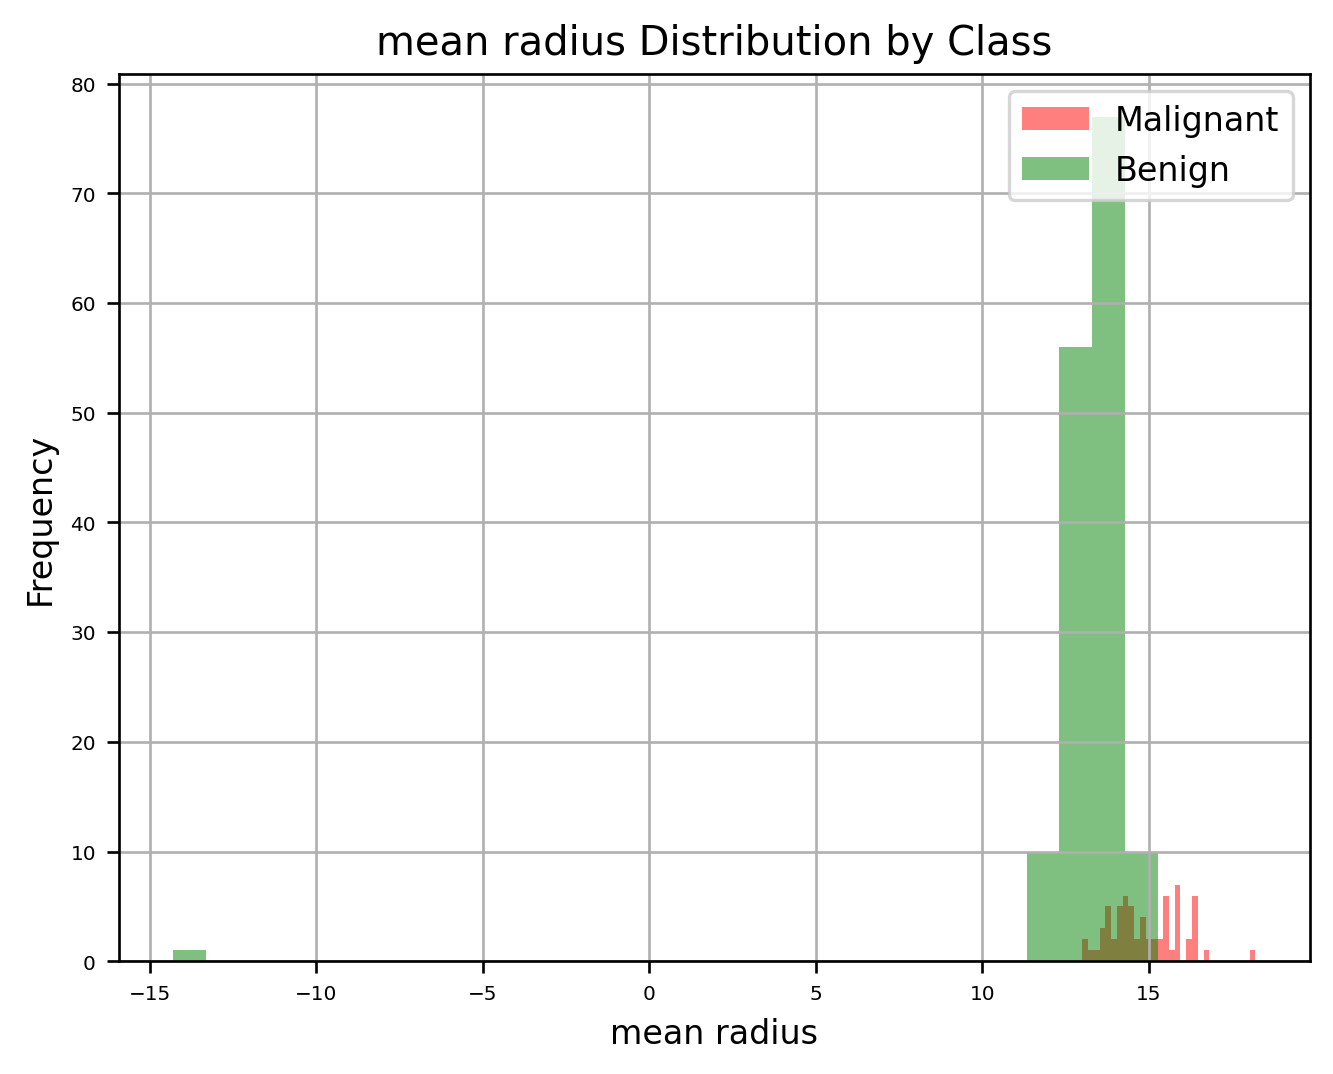

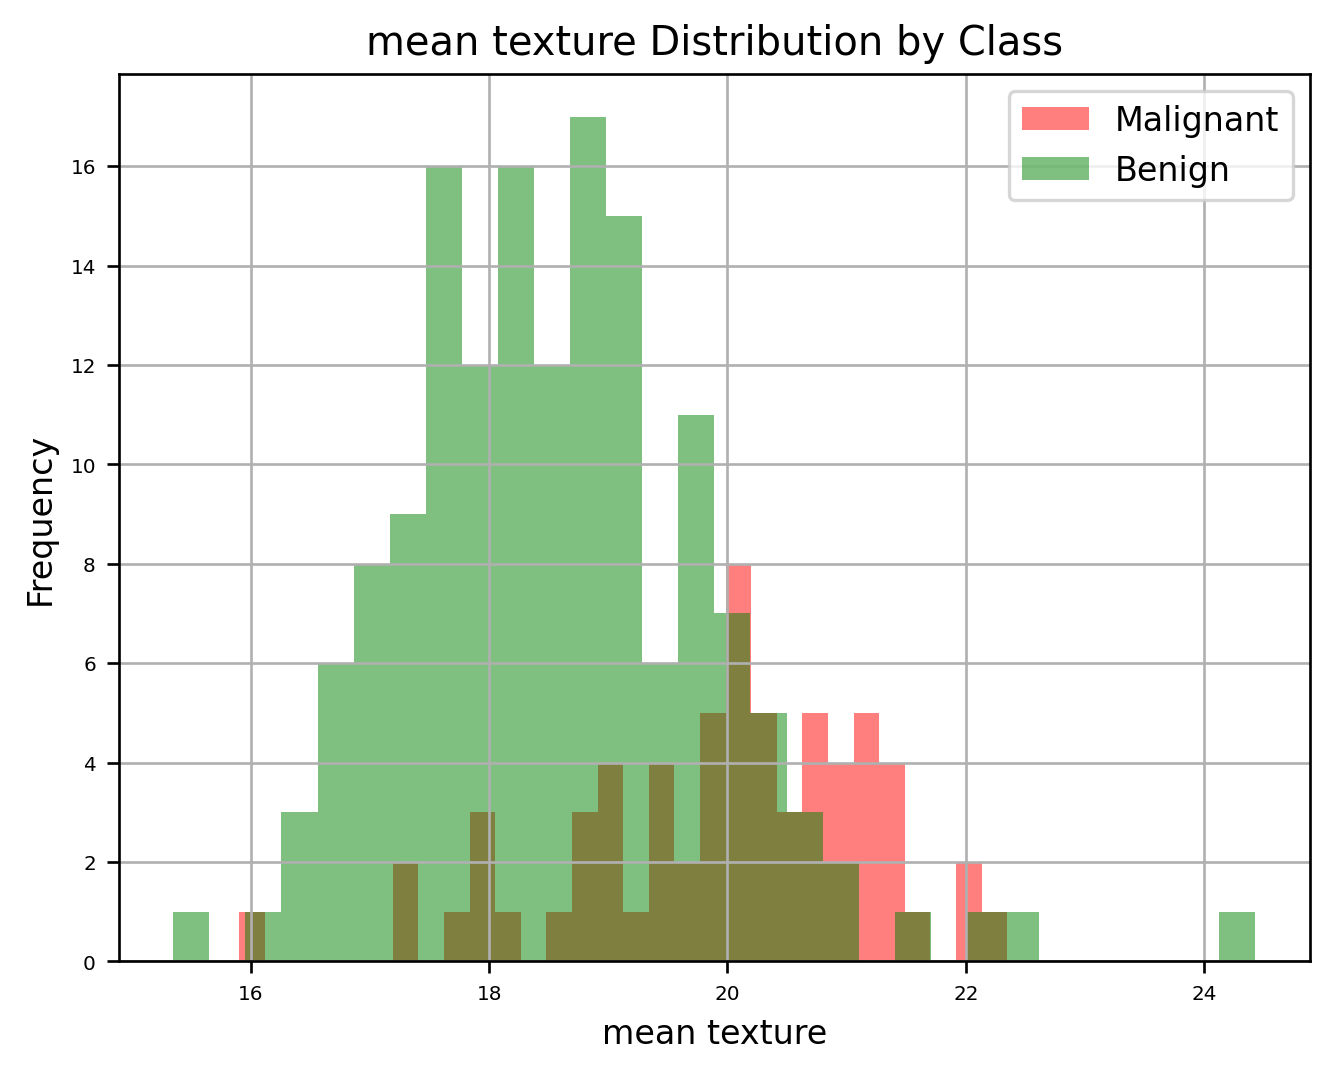

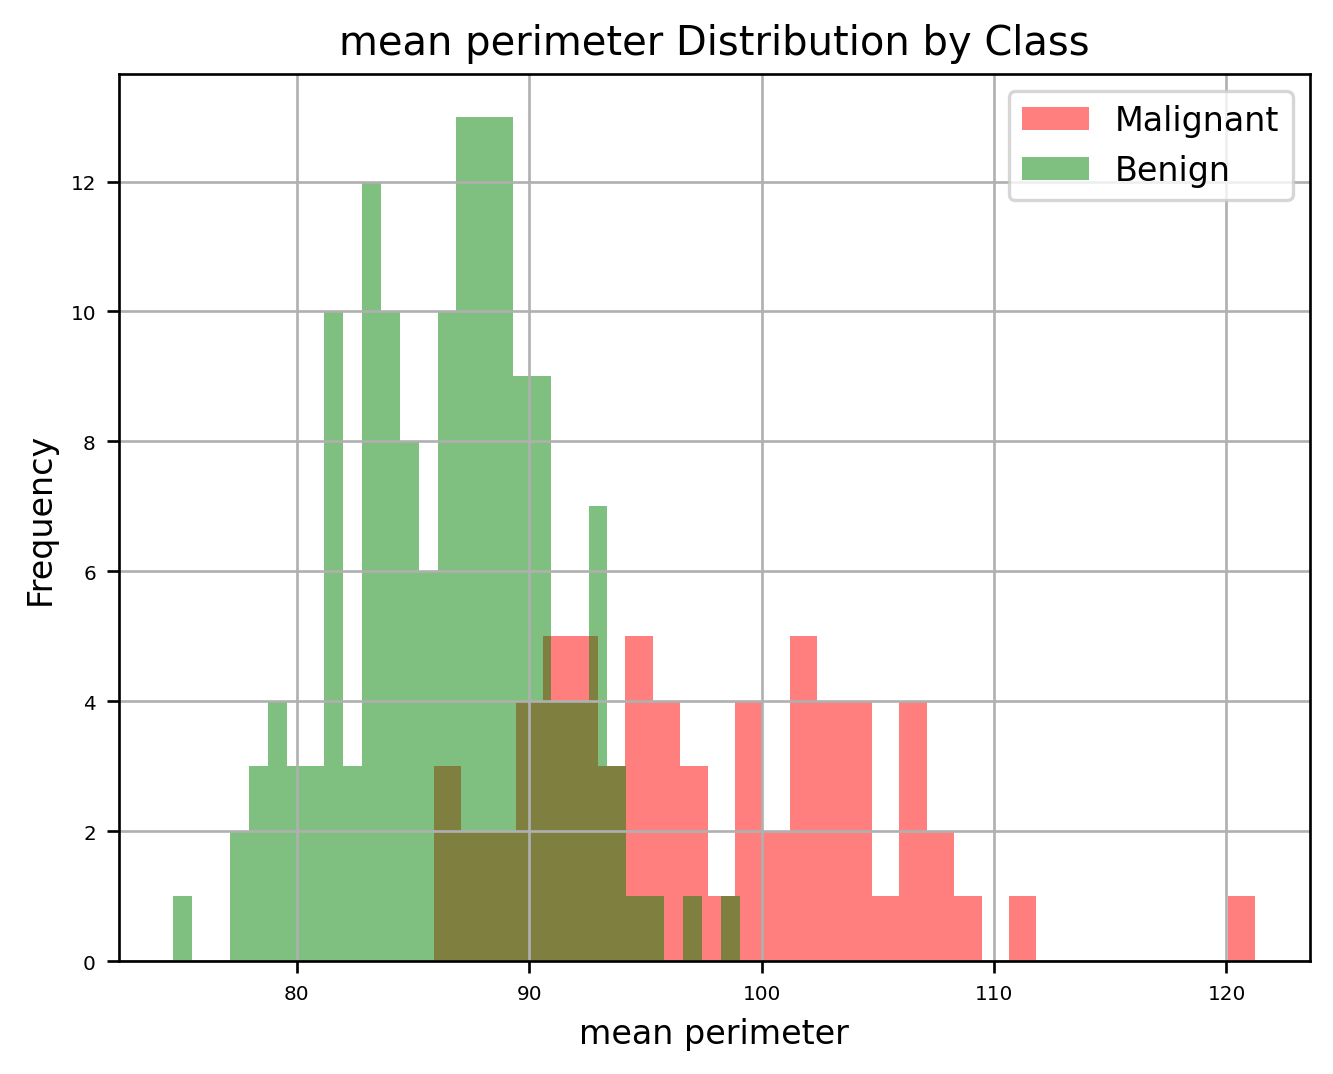

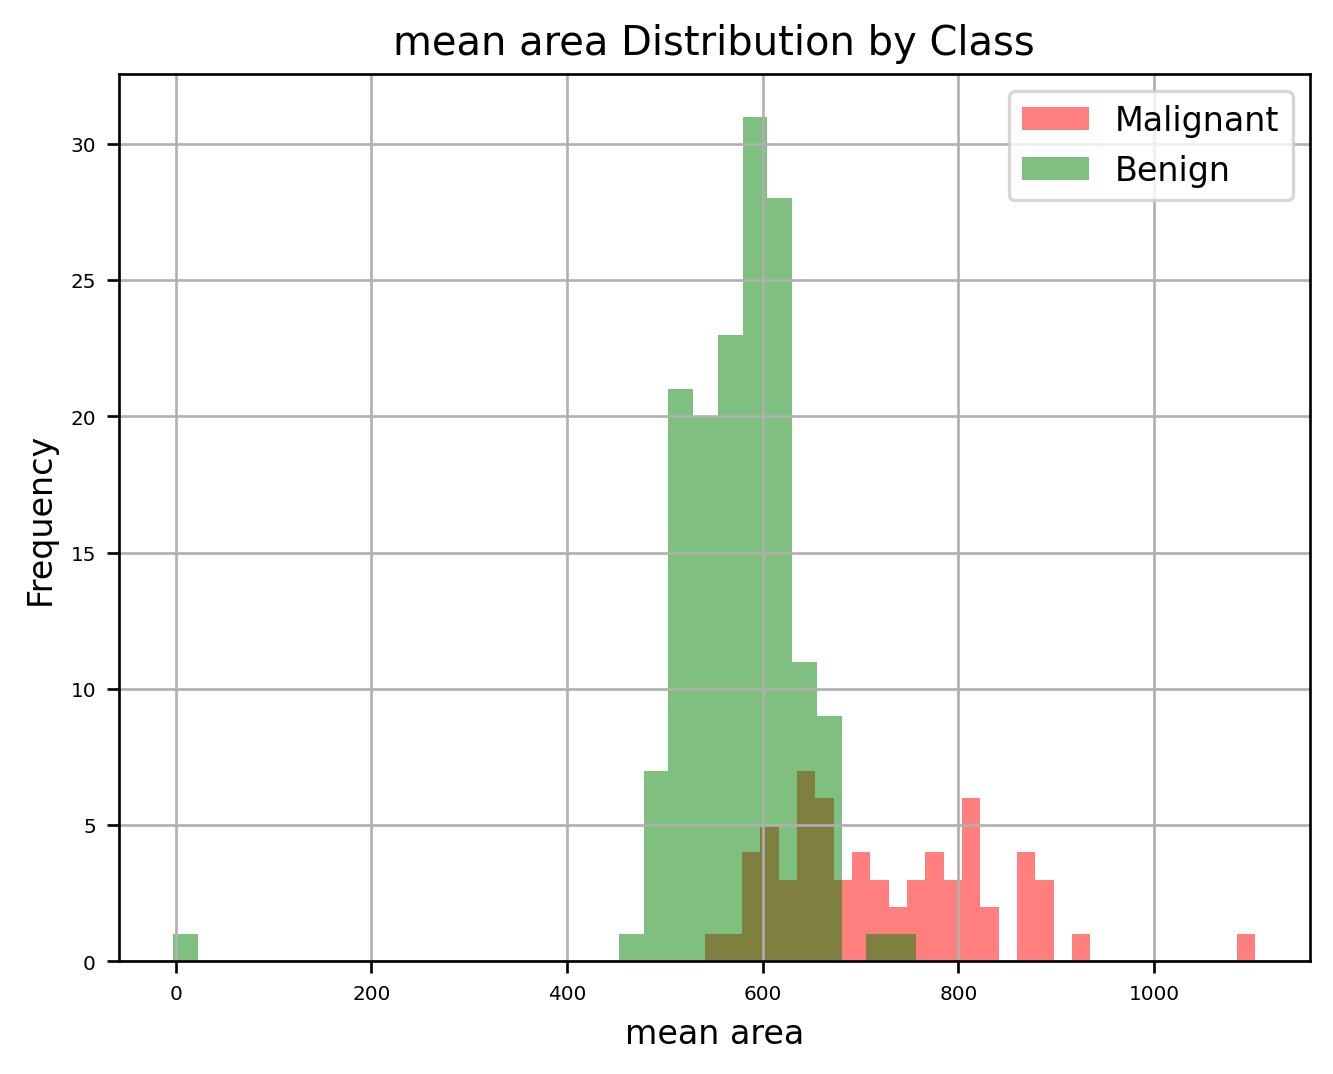

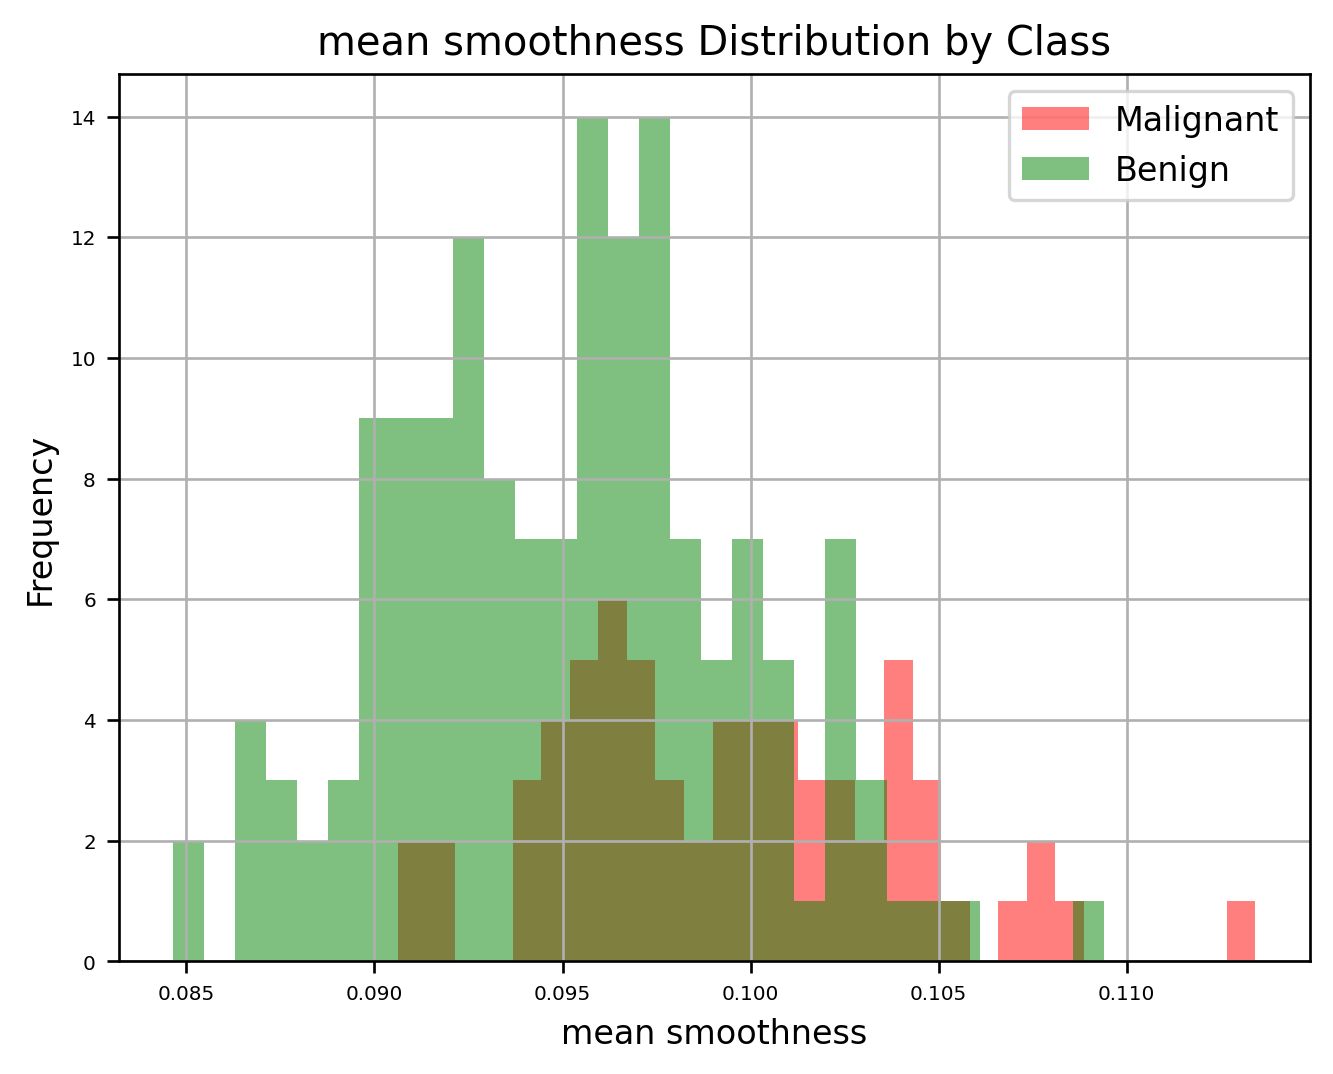

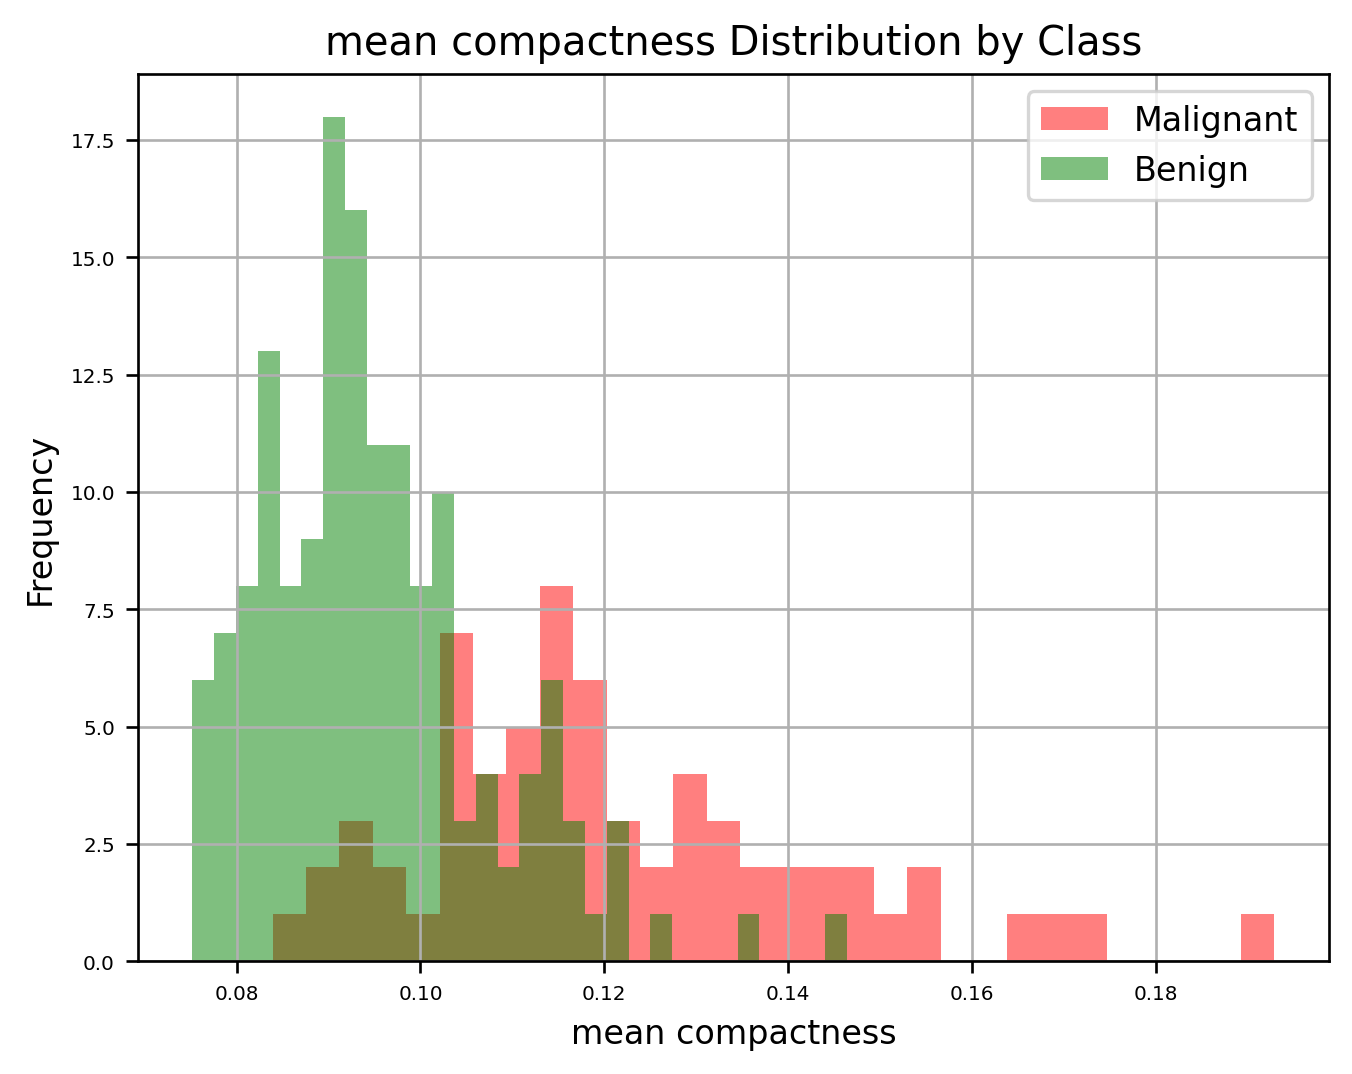

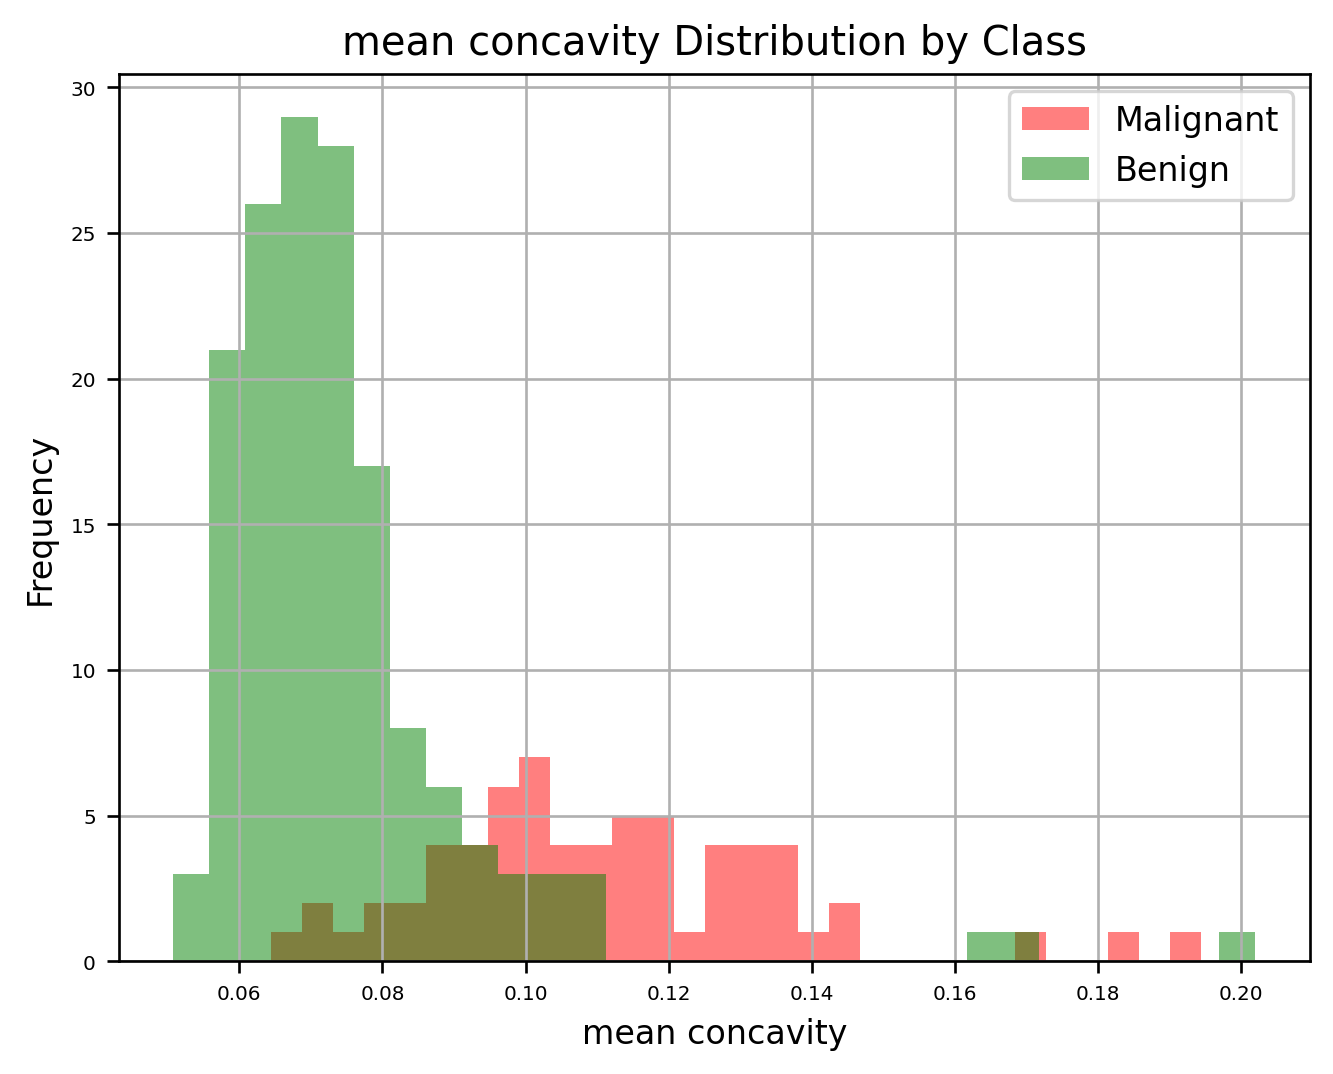

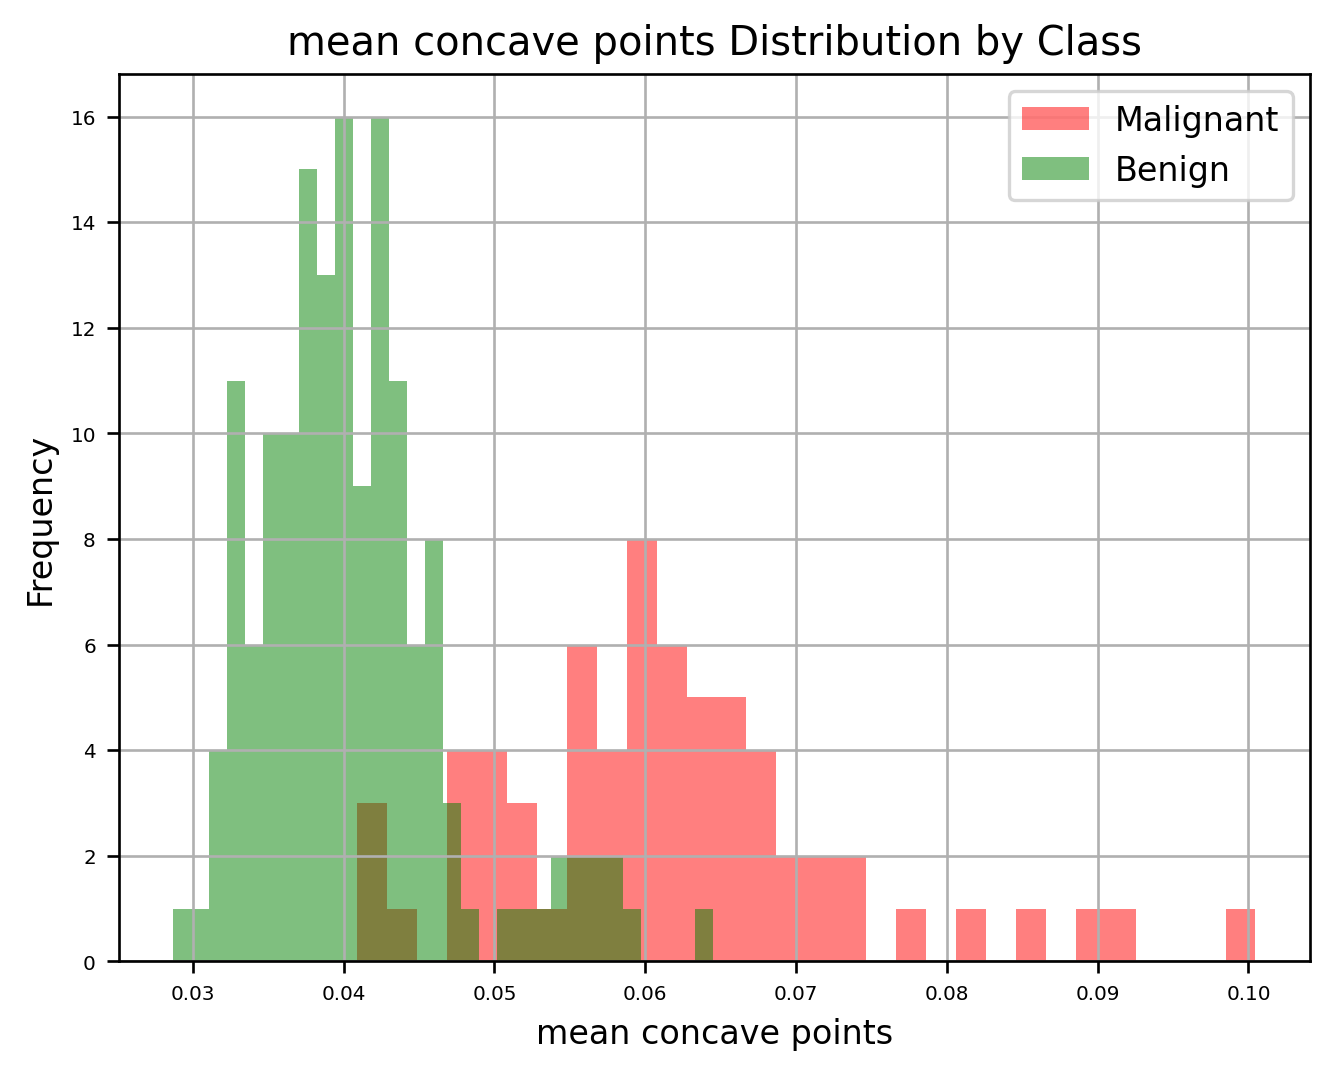

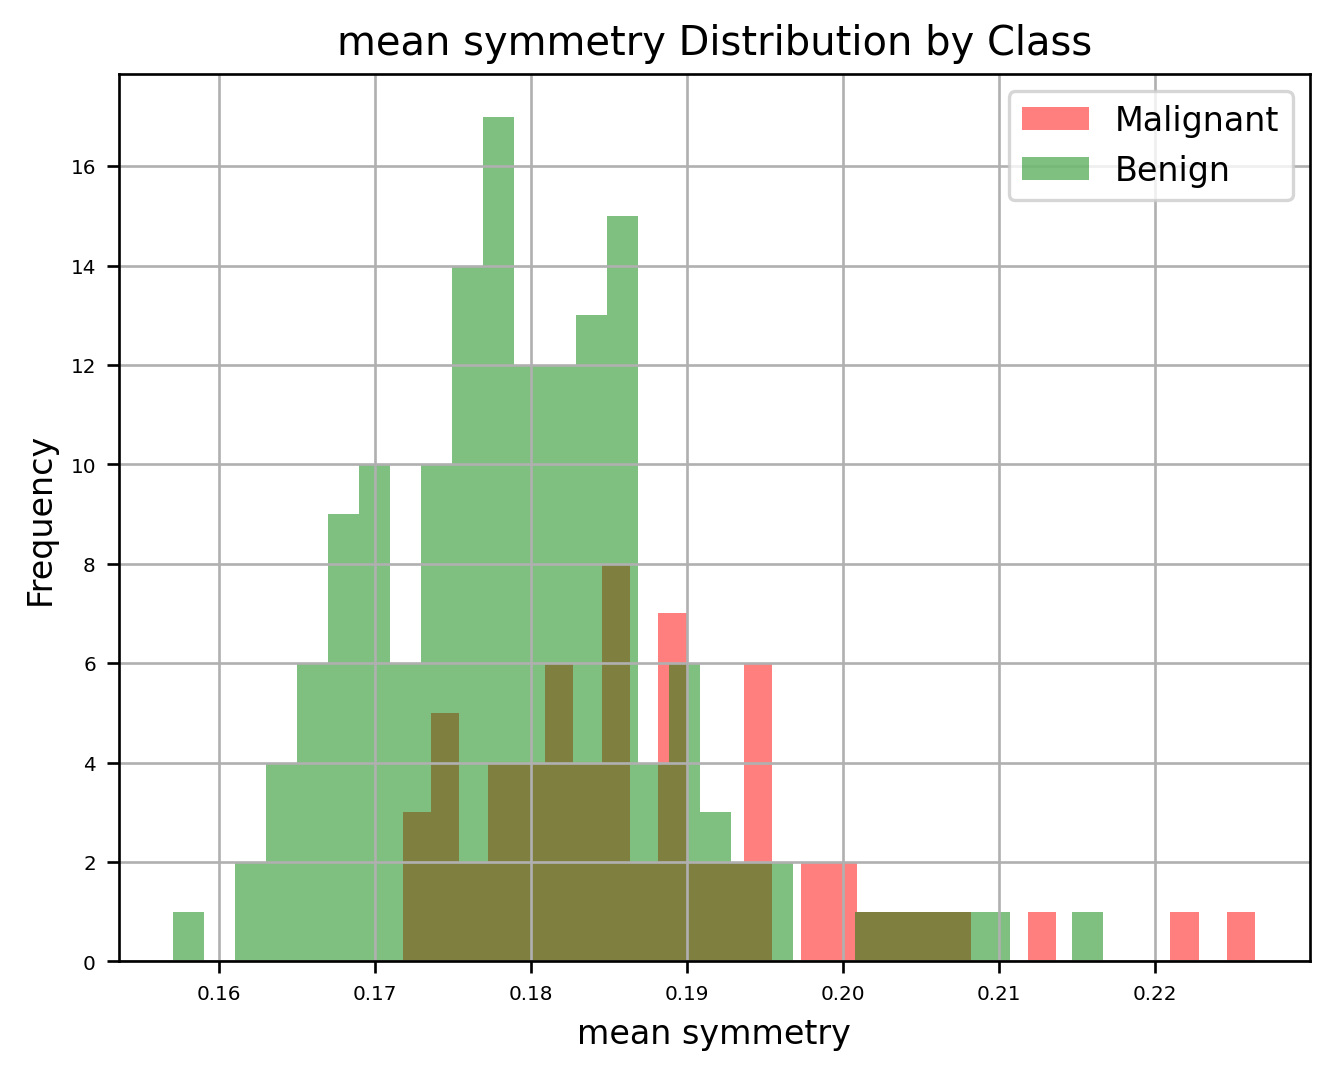

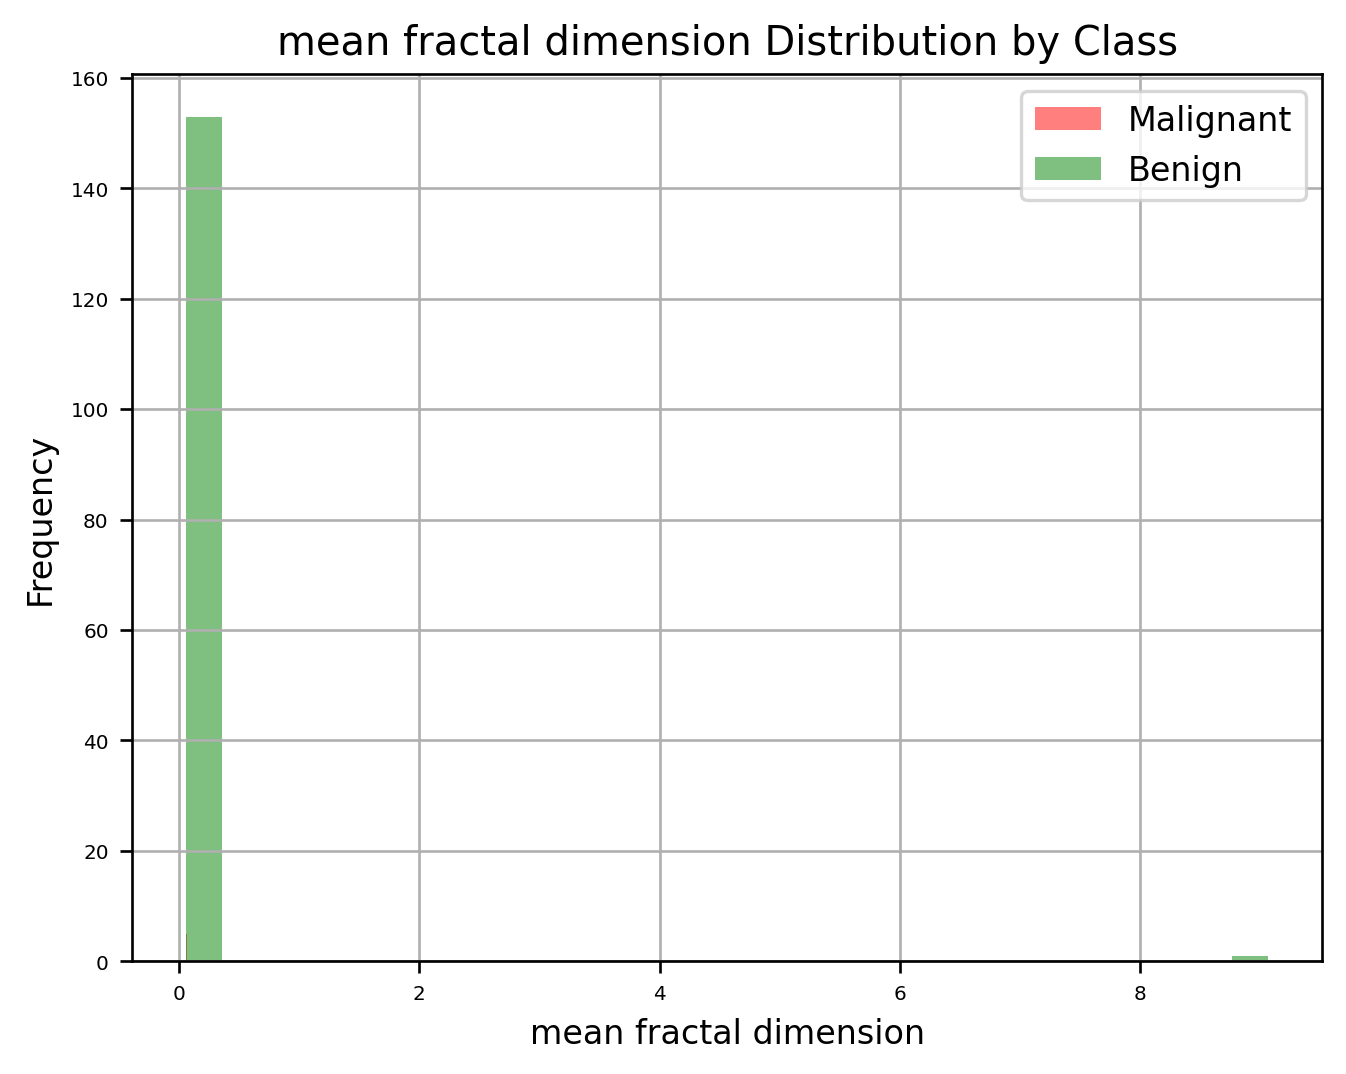

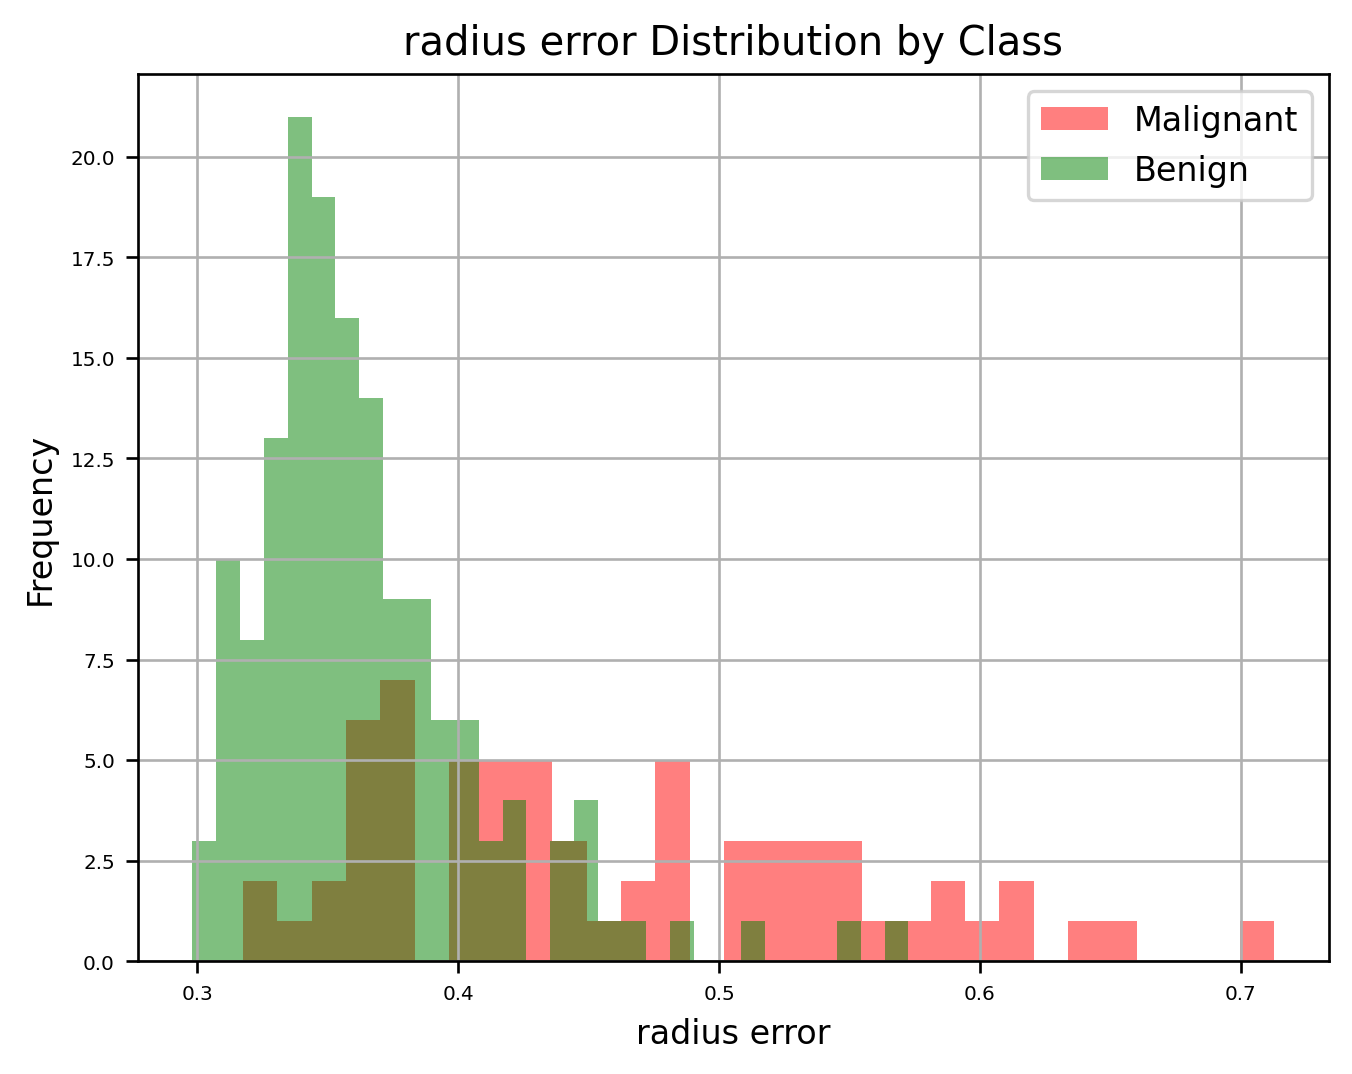

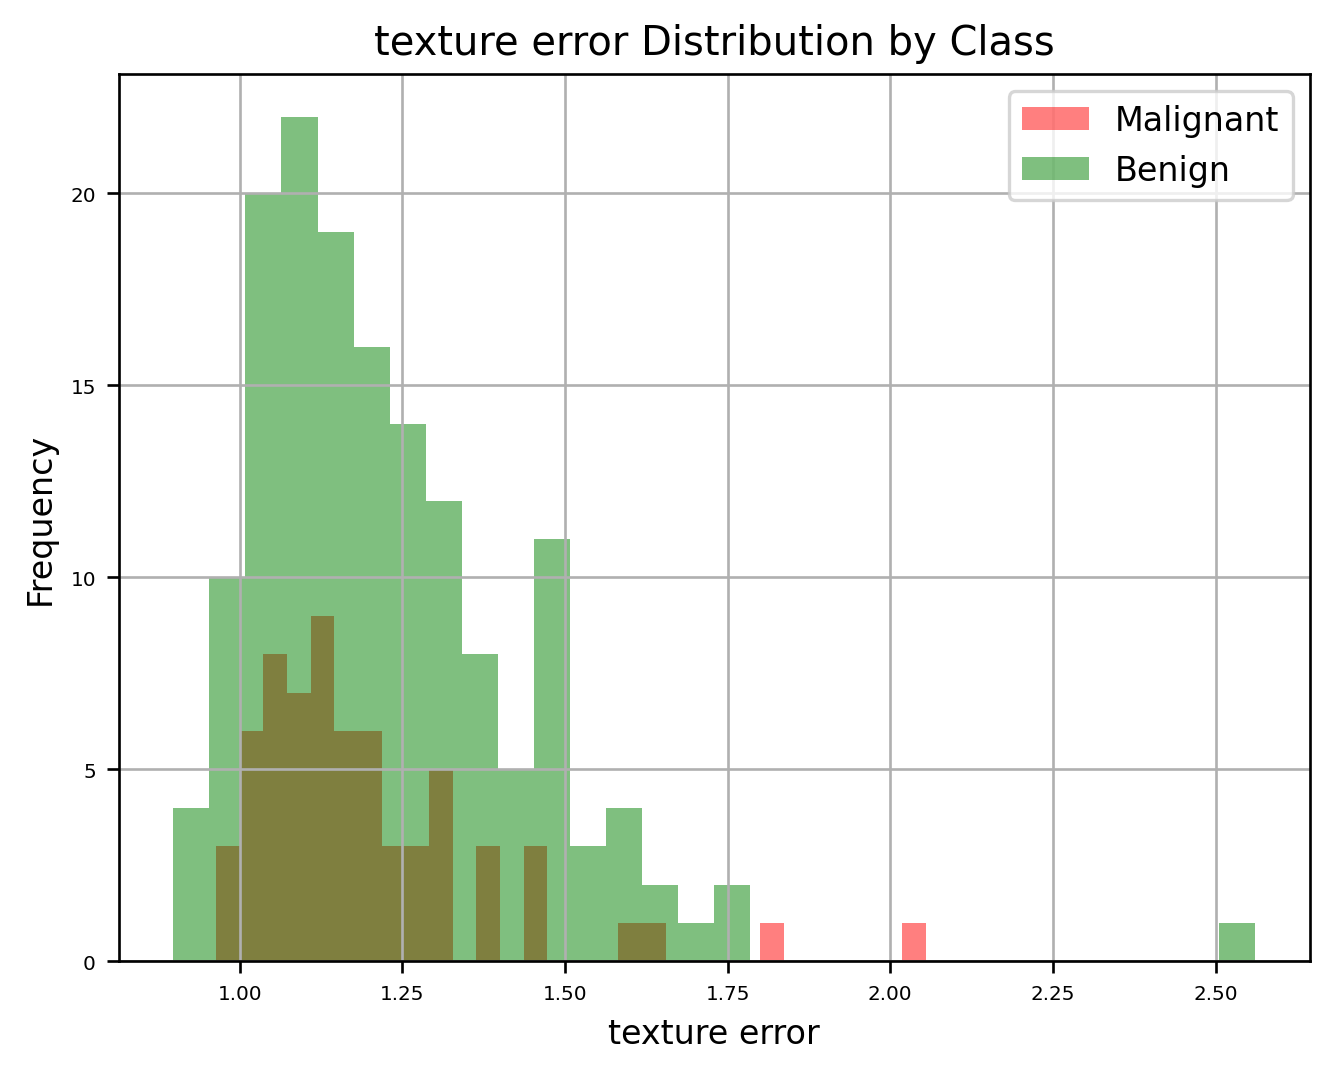

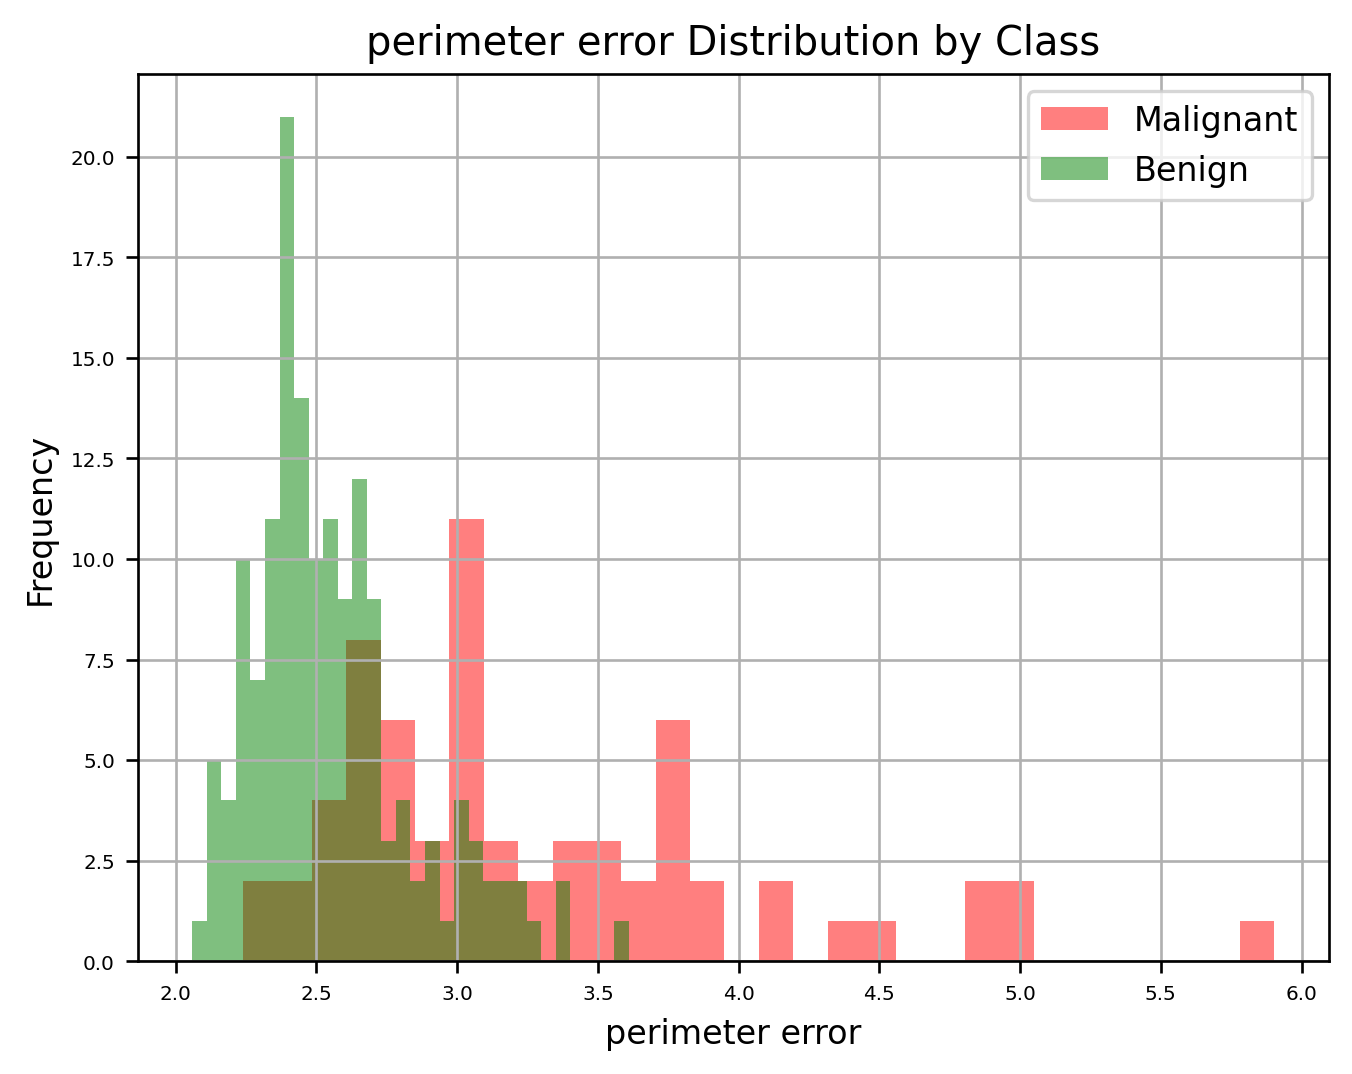

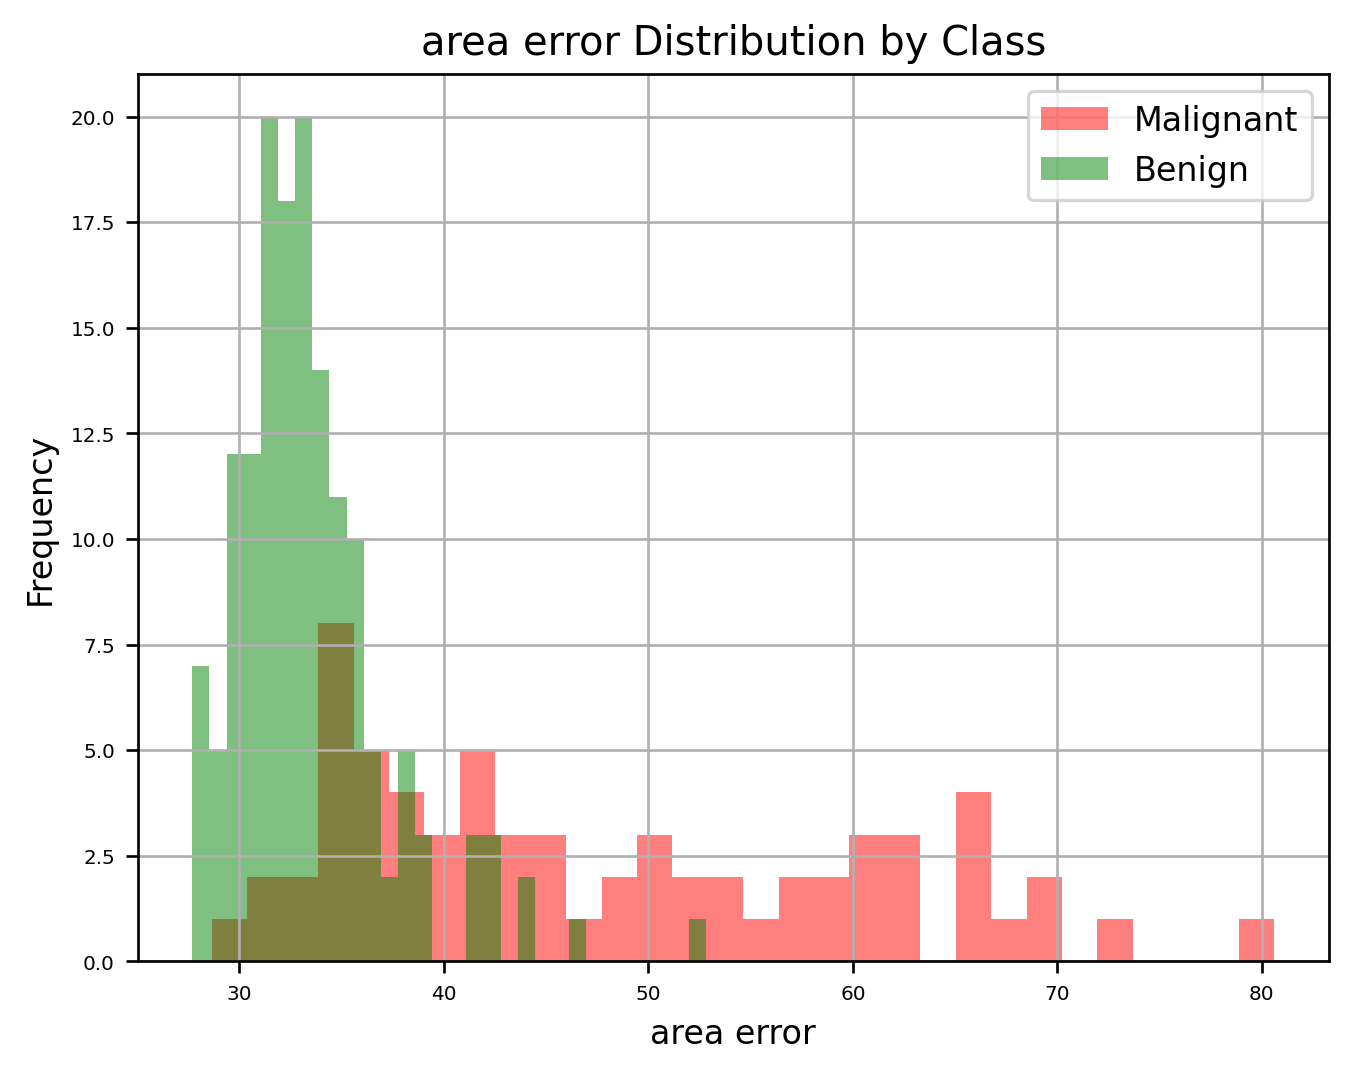

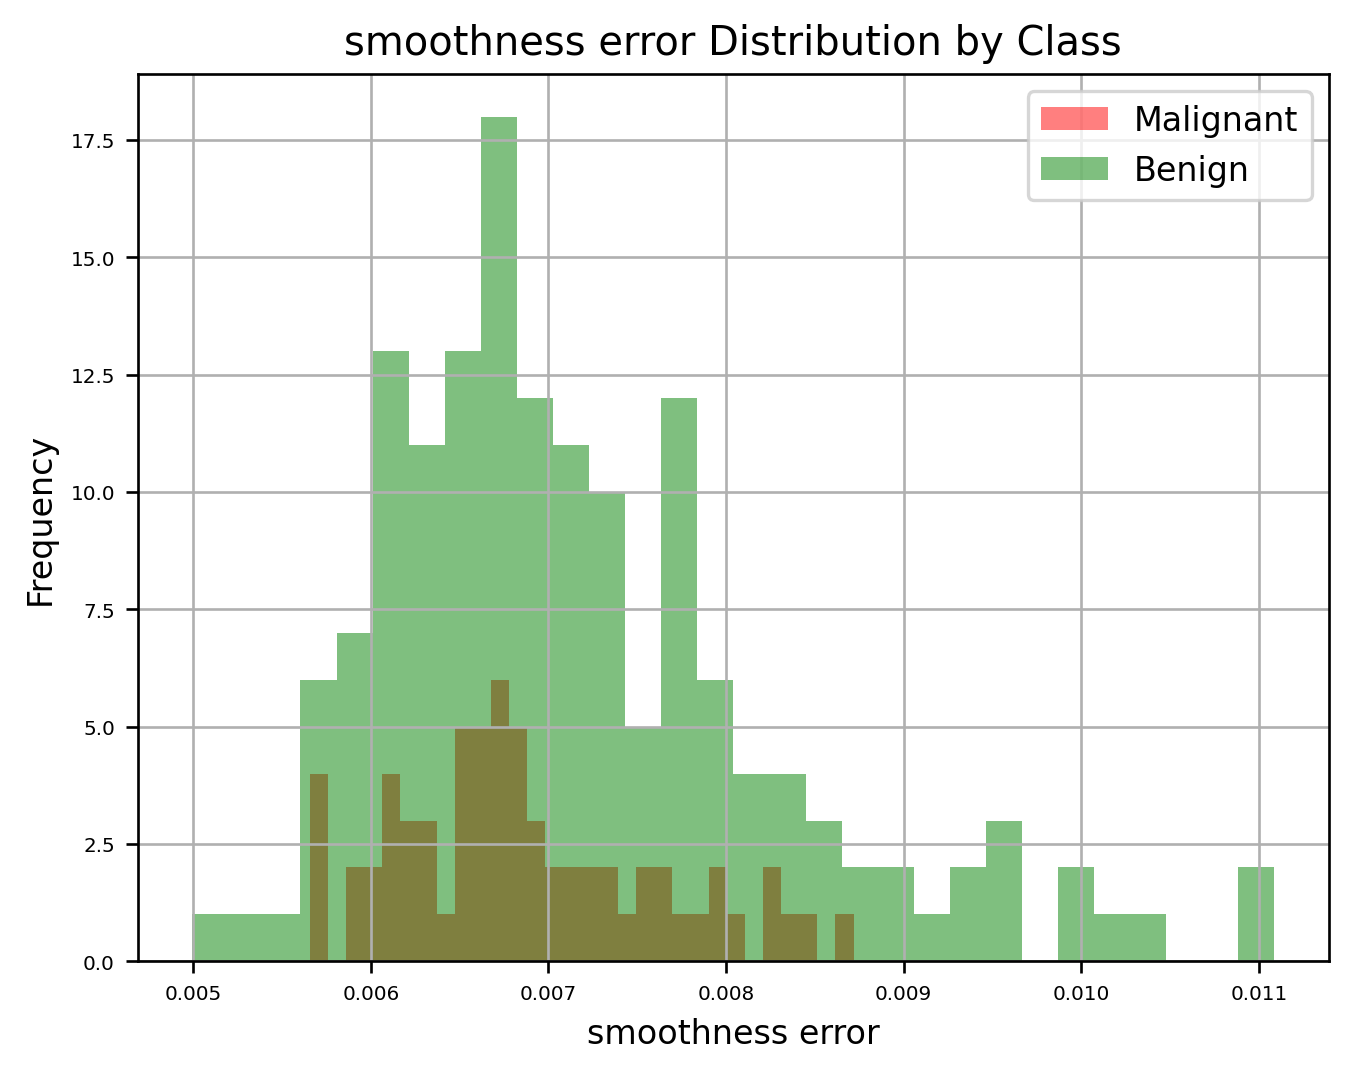

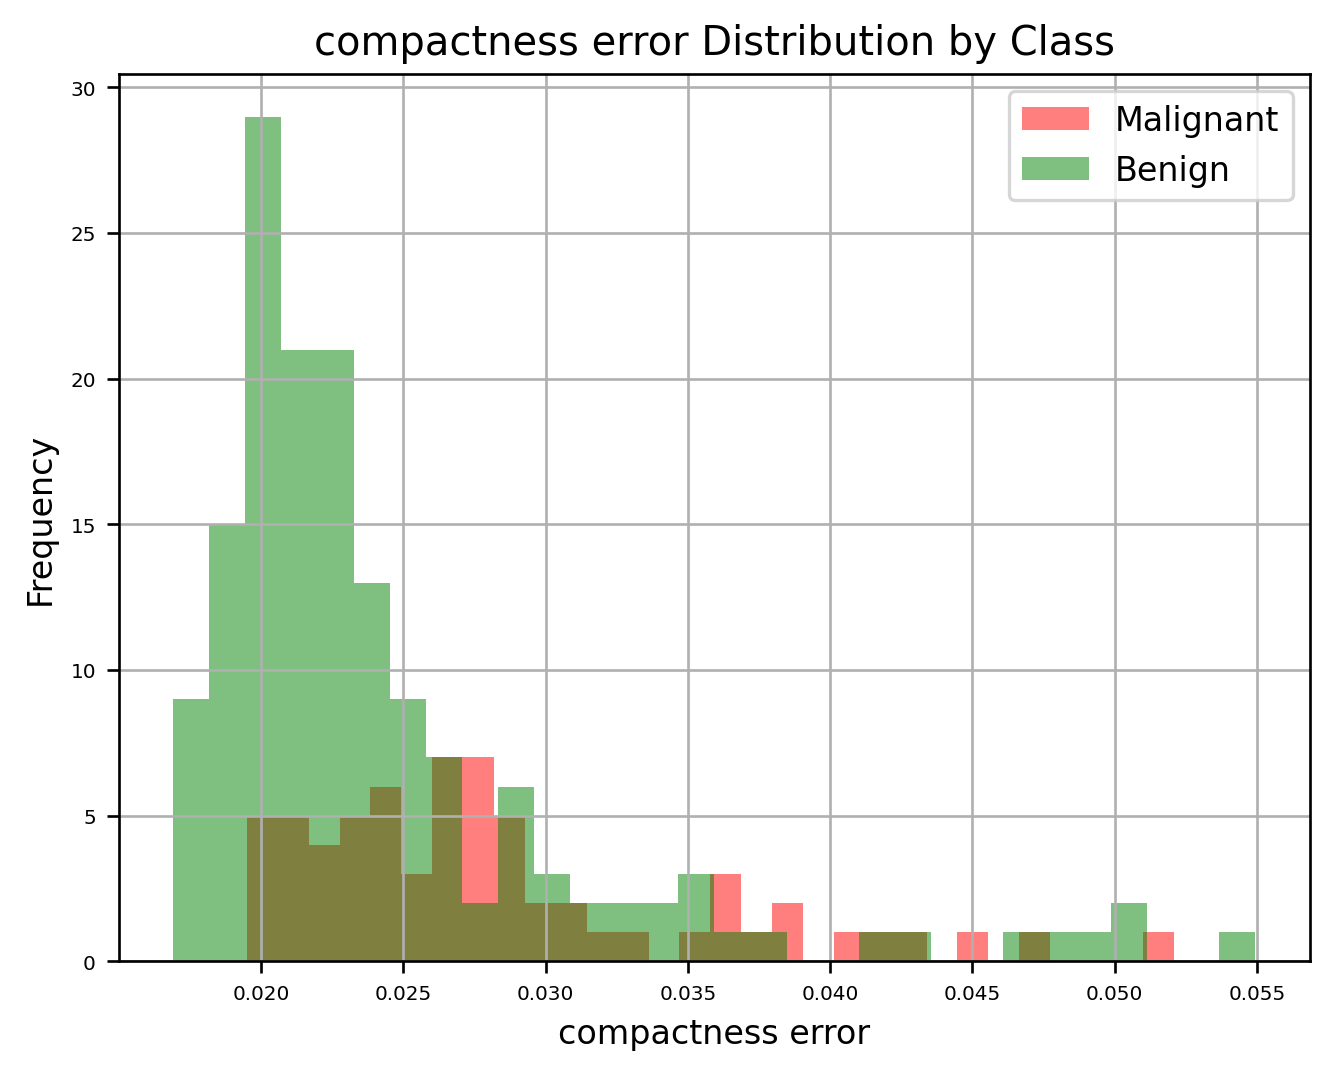

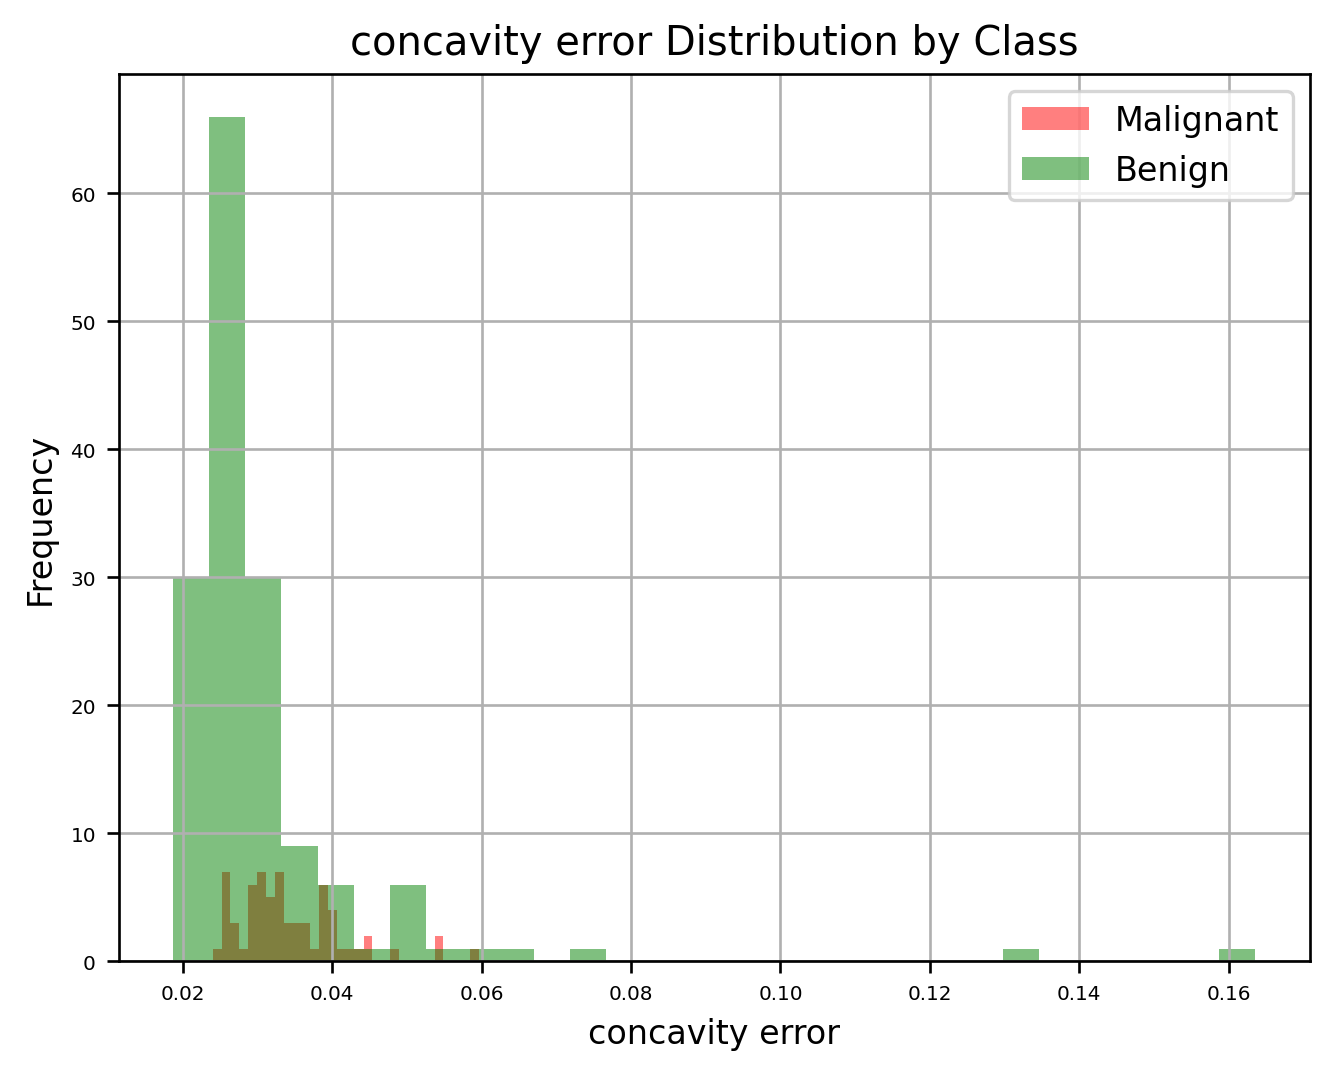

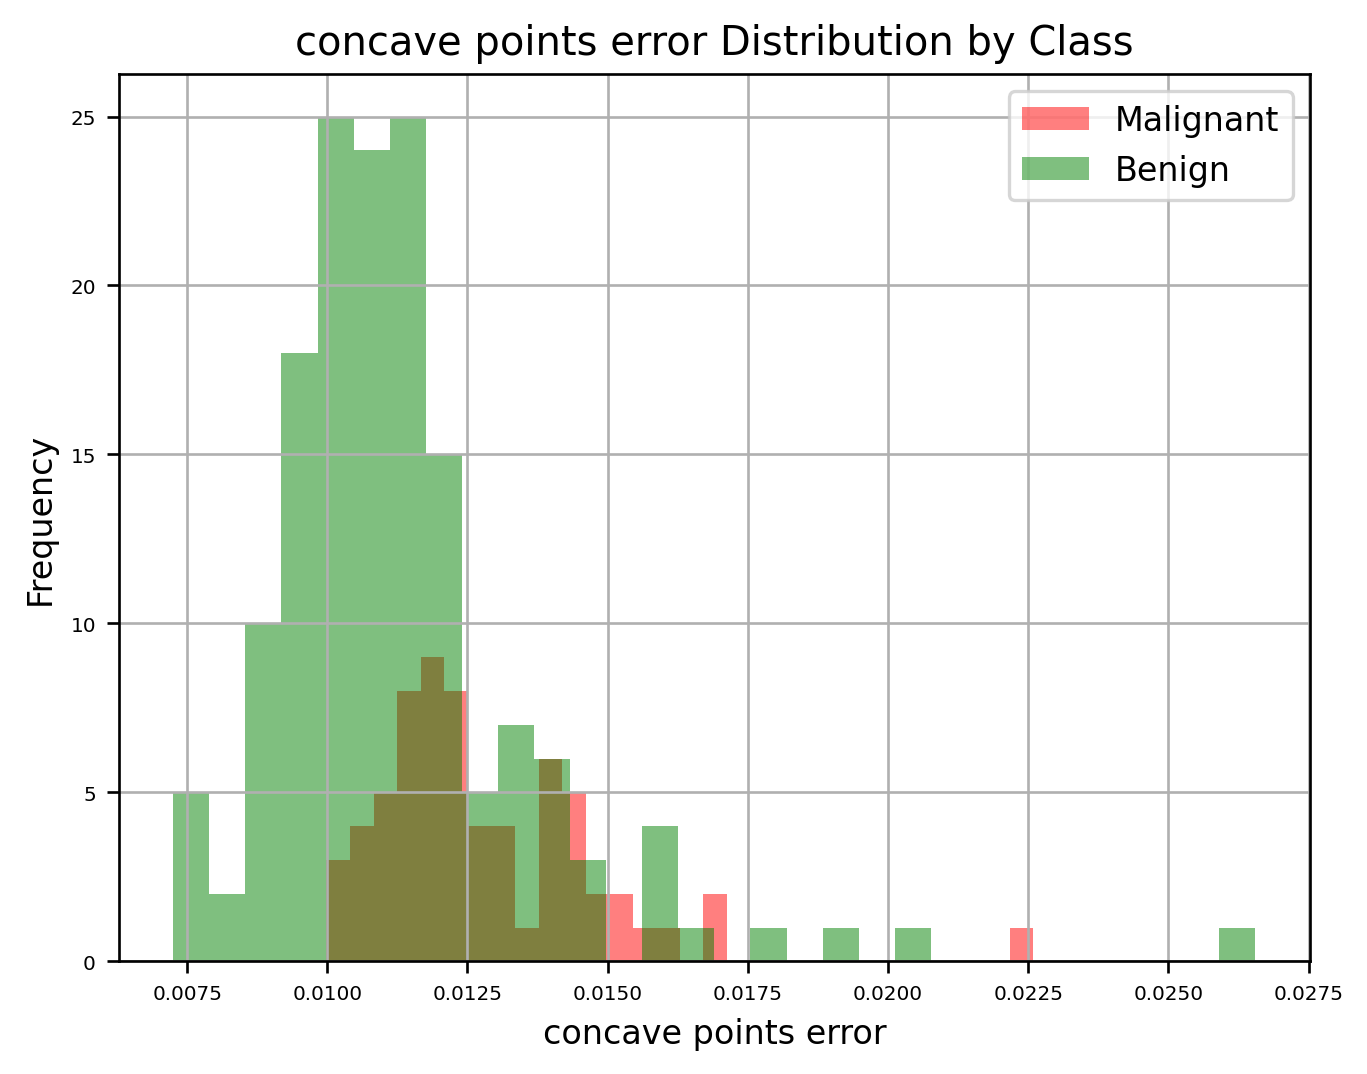

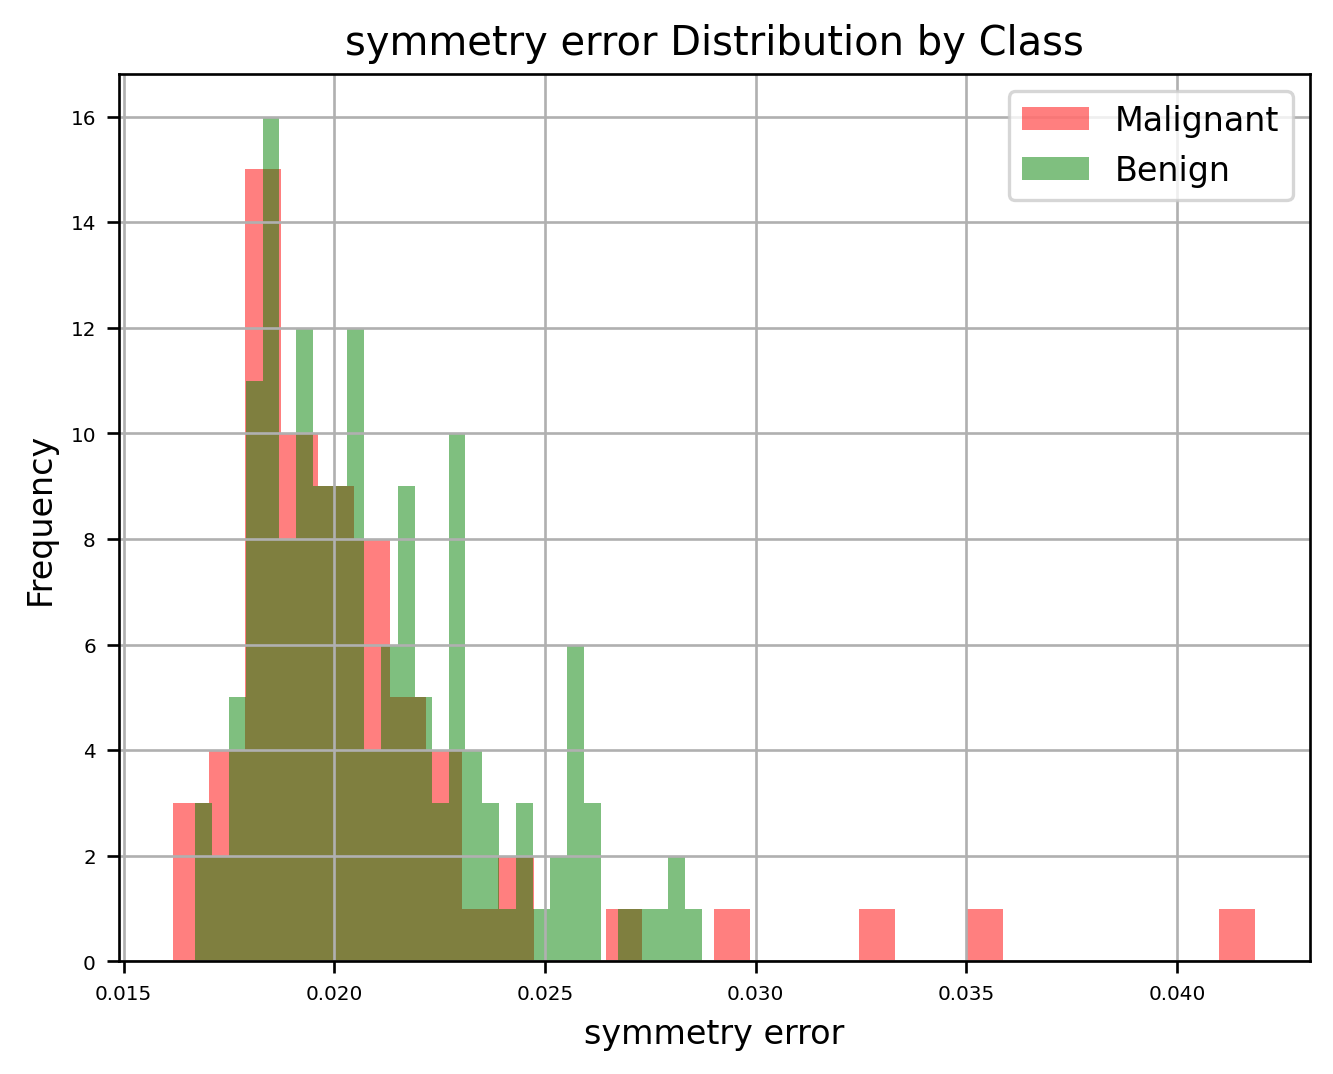

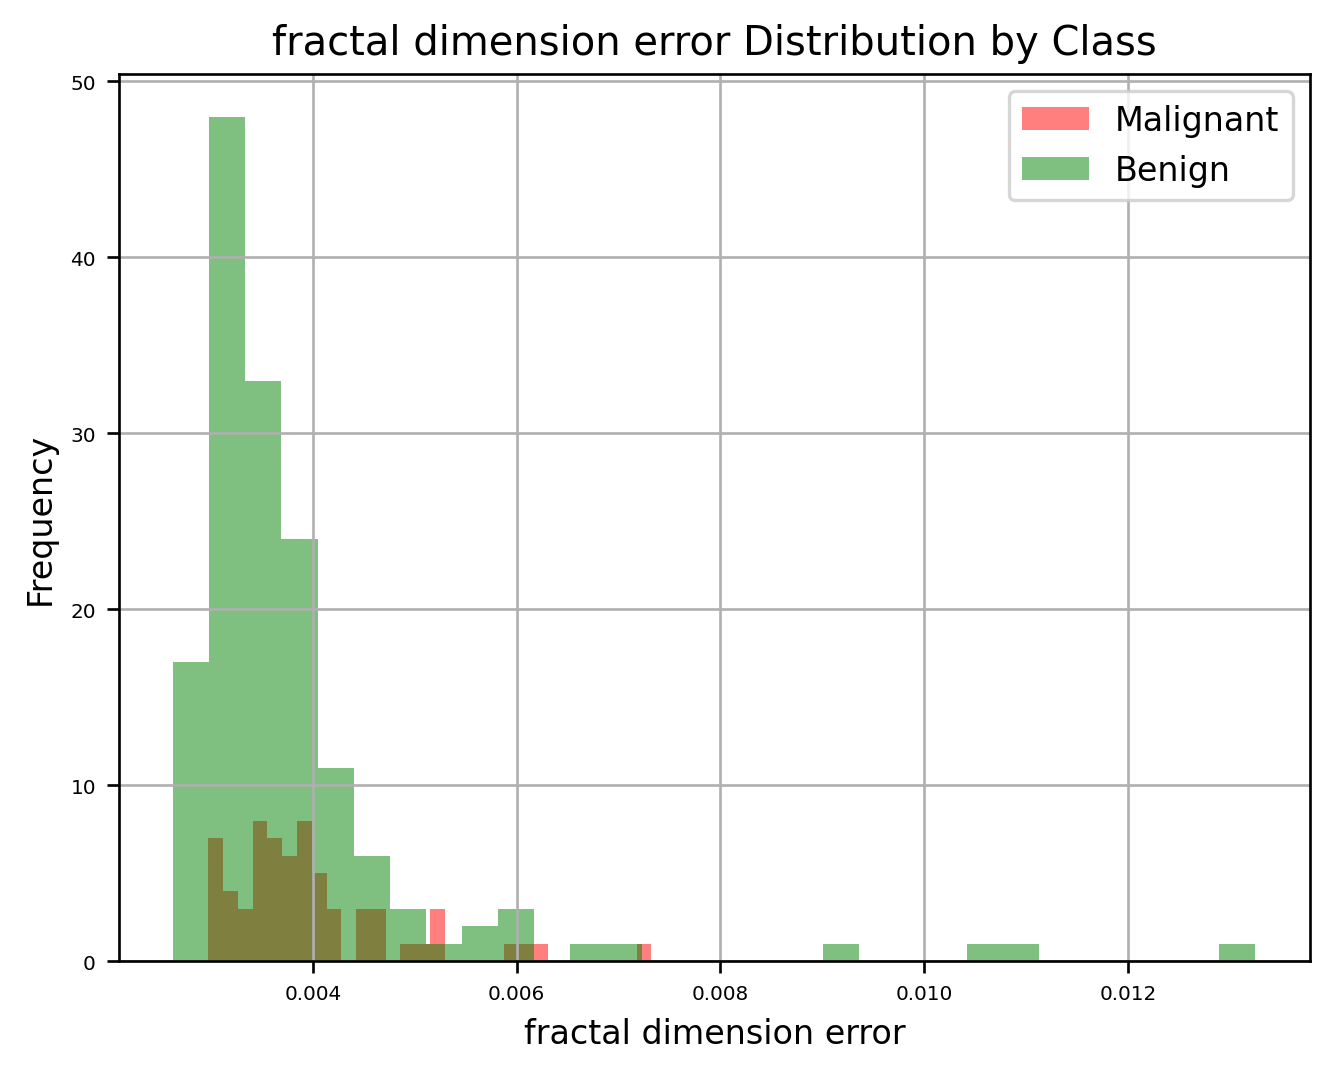

In [13]:
# Create plots for each feature
for feature in features:
    plt.figure()
    plt.hist(malignant_df[feature], alpha=0.5, label='Malignant', bins=30, color='red')
    plt.hist(benign_df[feature], alpha=0.5, label='Benign', bins=30, color='green')
    plt.title(f'{feature} Distribution by Class')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

In [ ]:
# Your code here

## 2. Prepare data and models, and make baseline measurements [20%]
 - Split data into appropriate sets using the `stratify` option to obtain consistent proportions of classes in each set.
 - Decide on appropriate pre-processing steps for the data.
 - Implement a _very_ simple baseline model that makes purely random predictions of the class.
 - Measure the baseline performance with the following metrics:
   - accuracy
   - balanced accuracy: accounts for imblanaced datasets, defined as _(sensitivity + specificity)/2_
   - recall
   - precision
   - auc
   - f1score
   - fbeta_scores with beta=0.1
   - fbeta_score with beta=10
 - Also display a confusion matrix for the baseline predictions.
 - As a second baseline, implement an SGD classifier and fit it once (without hyper-parameter optimisation) and then display the same performance metrics and a confusion matrix for its results.

In [19]:
#simple baseline model that makes purely random predictions of the class

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


df['label'] = df['label'].map({'benign': 0, 'malignant': 1})

# Define features and target
X = df.drop(columns=['label'])
y = df['label']

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Verify the split
print("Training set class distribution:\n", y_train.value_counts(normalize=True))
print("Testing set class distribution:\n", y_test.value_counts(normalize=True))

Training set class distribution:
 0    0.698864
1    0.301136
Name: label, dtype: float64
Testing set class distribution:
 0    0.704545
1    0.295455
Name: label, dtype: float64


In [26]:


# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [32]:
# Generate random predictions
np.random.seed(42)  # For reproducibility
random_predictions = np.random.choice([0, 1], size=len(y_test))


In [33]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score, roc_auc_score, f1_score, fbeta_score

# Calculate various performance metrics
accuracy = accuracy_score(y_test, random_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, random_predictions)
recall = recall_score(y_test, random_predictions)
precision = precision_score(y_test, random_predictions)
auc = roc_auc_score(y_test, random_predictions)
f1 = f1_score(y_test, random_predictions)
fbeta_0_1 = fbeta_score(y_test, random_predictions, beta=0.1)
fbeta_10 = fbeta_score(y_test, random_predictions, beta=10)

# Print the performance metrics
print(f"Baseline Random Model Accuracy: {accuracy:.2f}")
print(f"Baseline Random Model Balanced Accuracy: {balanced_accuracy:.2f}")
print(f"Baseline Random Model Recall: {recall:.2f}")
print(f"Baseline Random Model Precision: {precision:.2f}")
print(f"Baseline Random Model AUC: {auc:.2f}")
print(f"Baseline Random Model F1 Score: {f1:.2f}")
print(f"Baseline Random Model F-beta Score (beta=0.1): {fbeta_0_1:.2f}")
print(f"Baseline Random Model F-beta Score (beta=10): {fbeta_10:.2f}")

Baseline Random Model Accuracy: 0.48
Baseline Random Model Balanced Accuracy: 0.47
Baseline Random Model Recall: 0.46
Baseline Random Model Precision: 0.27
Baseline Random Model AUC: 0.47
Baseline Random Model F1 Score: 0.34
Baseline Random Model F-beta Score (beta=0.1): 0.27
Baseline Random Model F-beta Score (beta=10): 0.46


In [34]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, random_predictions)
print(conf_matrix)

[[15 16]
 [ 7  6]]


In [35]:
from sklearn.linear_model import SGDClassifier

# Initialize and fit the SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_scaled, y_train)

# Predict using the SGDClassifier
sgd_predictions = sgd_clf.predict(X_test_scaled) 

In [36]:
# Calculate various performance metrics
accuracy = accuracy_score(y_test, sgd_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, sgd_predictions)
recall = recall_score(y_test, sgd_predictions)
precision = precision_score(y_test, sgd_predictions)
auc = roc_auc_score(y_test, sgd_predictions)
f1 = f1_score(y_test, sgd_predictions)
fbeta_0_1 = fbeta_score(y_test, sgd_predictions, beta=0.1)
fbeta_10 = fbeta_score(y_test, sgd_predictions, beta=10)

# Print the performance metrics
print(f"SGD Classifier Accuracy: {accuracy:.2f}")
print(f"SGD Classifier Balanced Accuracy: {balanced_accuracy:.2f}")
print(f"SGD Classifier Recall: {recall:.2f}")
print(f"SGD Classifier Precision: {precision:.2f}")
print(f"SGD Classifier AUC: {auc:.2f}")
print(f"SGD Classifier F1 Score: {f1:.2f}")
print(f"SGD Classifier F-beta Score (beta=0.1): {fbeta_0_1:.2f}")
print(f"SGD Classifier F-beta Score (beta=10): {fbeta_10:.2f}")

SGD Classifier Accuracy: 0.95
SGD Classifier Balanced Accuracy: 0.92
SGD Classifier Recall: 0.85
SGD Classifier Precision: 1.00
SGD Classifier AUC: 0.92
SGD Classifier F1 Score: 0.92
SGD Classifier F-beta Score (beta=0.1): 1.00
SGD Classifier F-beta Score (beta=10): 0.85


In [37]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, sgd_predictions)
print(conf_matrix)

[[31  0]
 [ 2 11]]


## 3. Model Optimisation [40%]

### 3.1 Performance metric
Choose one performance metric from the above set. State your choice and explain why you chose it. [50 words maximum]

I choose balanced accuracy because it accounts for class imbalance, providing a more accurate representation of the model's performance on both benign and malignant classes. This metric is crucial for medical datasets where the minority class (malignant cases) is as important as the majority class.

### 3.2 Hyper-parameter optimisation
 - Perform a hyper-parameter optimisation (using appropriate methods) on three models:
   - SGD Classifer
   - SVM
   - One other model of your choice
 - Display the results of each model (including confusion matrices) and choose the best model.
 - Choose the best model and display the final results of this model.

In [38]:
from sklearn.model_selection import GridSearchCV

# Hyper-parameter optimization for SGD Classifier
sgd_clf = SGDClassifier(random_state=42)
sgd_param_grid = {
    'loss': ['hinge', 'log', 'modified_huber'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.001, 0.01, 0.1]
}
sgd_grid_search = GridSearchCV(sgd_clf, sgd_param_grid, cv=5, scoring='balanced_accuracy')
sgd_grid_search.fit(X_train_scaled, y_train)



C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\sit

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\sit

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\sit

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\sit

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\sit

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\sit

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\sit

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\sit

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\sit

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\sit

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\sit

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\lib\sit

GridSearchCV(cv=5, estimator=SGDClassifier(random_state=42),
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'eta0': [0.001, 0.01, 0.1],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['hinge', 'log', 'modified_huber'],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='balanced_accuracy')

In [39]:
from sklearn.svm import SVC

# Hyper-parameter optimization for SVM
svm_clf = SVC(random_state=42)
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}
svm_grid_search = GridSearchCV(svm_clf, svm_param_grid, cv=5, scoring='balanced_accuracy')
svm_grid_search.fit(X_train_scaled, y_train)



GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='balanced_accuracy')

In [40]:
from sklearn.ensemble import RandomForestClassifier

# Hyper-parameter optimization for Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=5, scoring='balanced_accuracy')
rf_grid_search.fit(X_train_scaled, y_train)



GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='balanced_accuracy')

In [41]:
# Get the best models
best_sgd_clf = sgd_grid_search.best_estimator_
best_svm_clf = svm_grid_search.best_estimator_
best_rf_clf = rf_grid_search.best_estimator_


SGD Classifier:
Accuracy: 0.93
Balanced Accuracy: 0.88
Recall: 0.77
Precision: 1.00
AUC: 0.88
F1 Score: 0.87
F-beta Score (beta=0.1): 1.00
F-beta Score (beta=10): 0.77


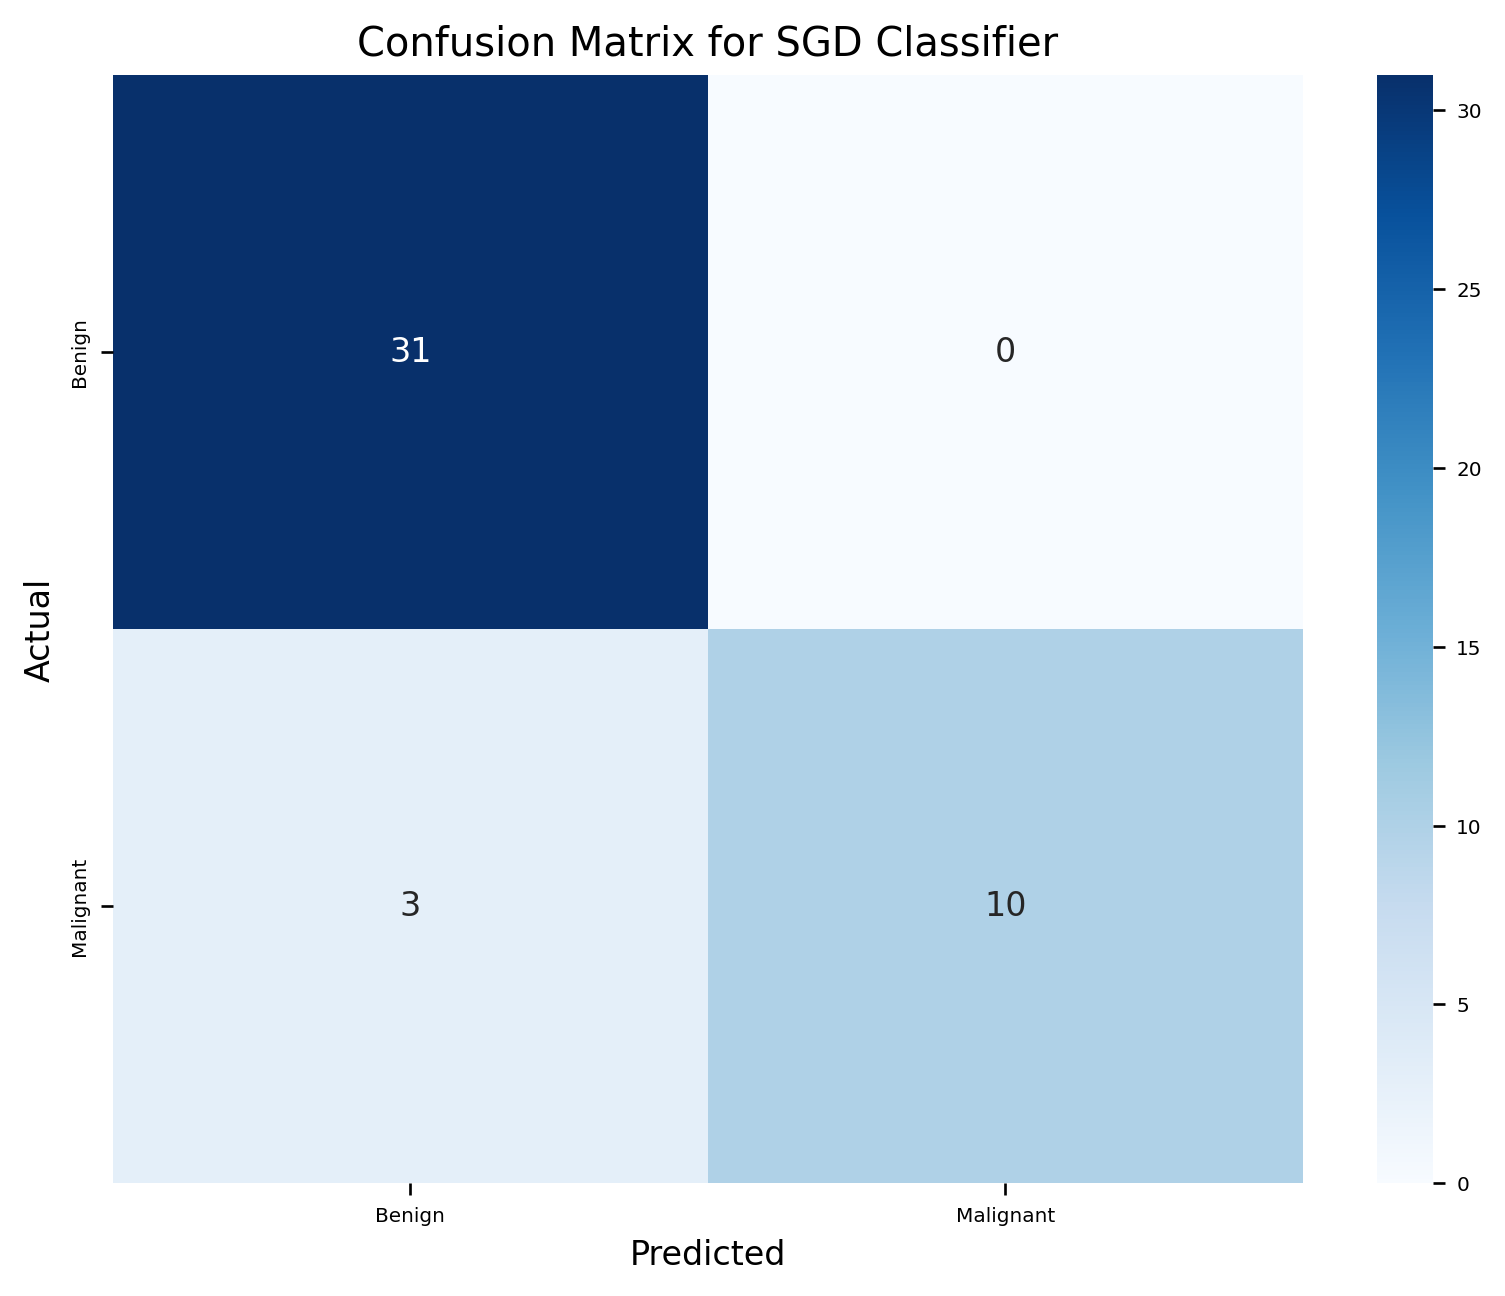


SVM Classifier:
Accuracy: 0.98
Balanced Accuracy: 0.96
Recall: 0.92
Precision: 1.00
AUC: 0.96
F1 Score: 0.96
F-beta Score (beta=0.1): 1.00
F-beta Score (beta=10): 0.92


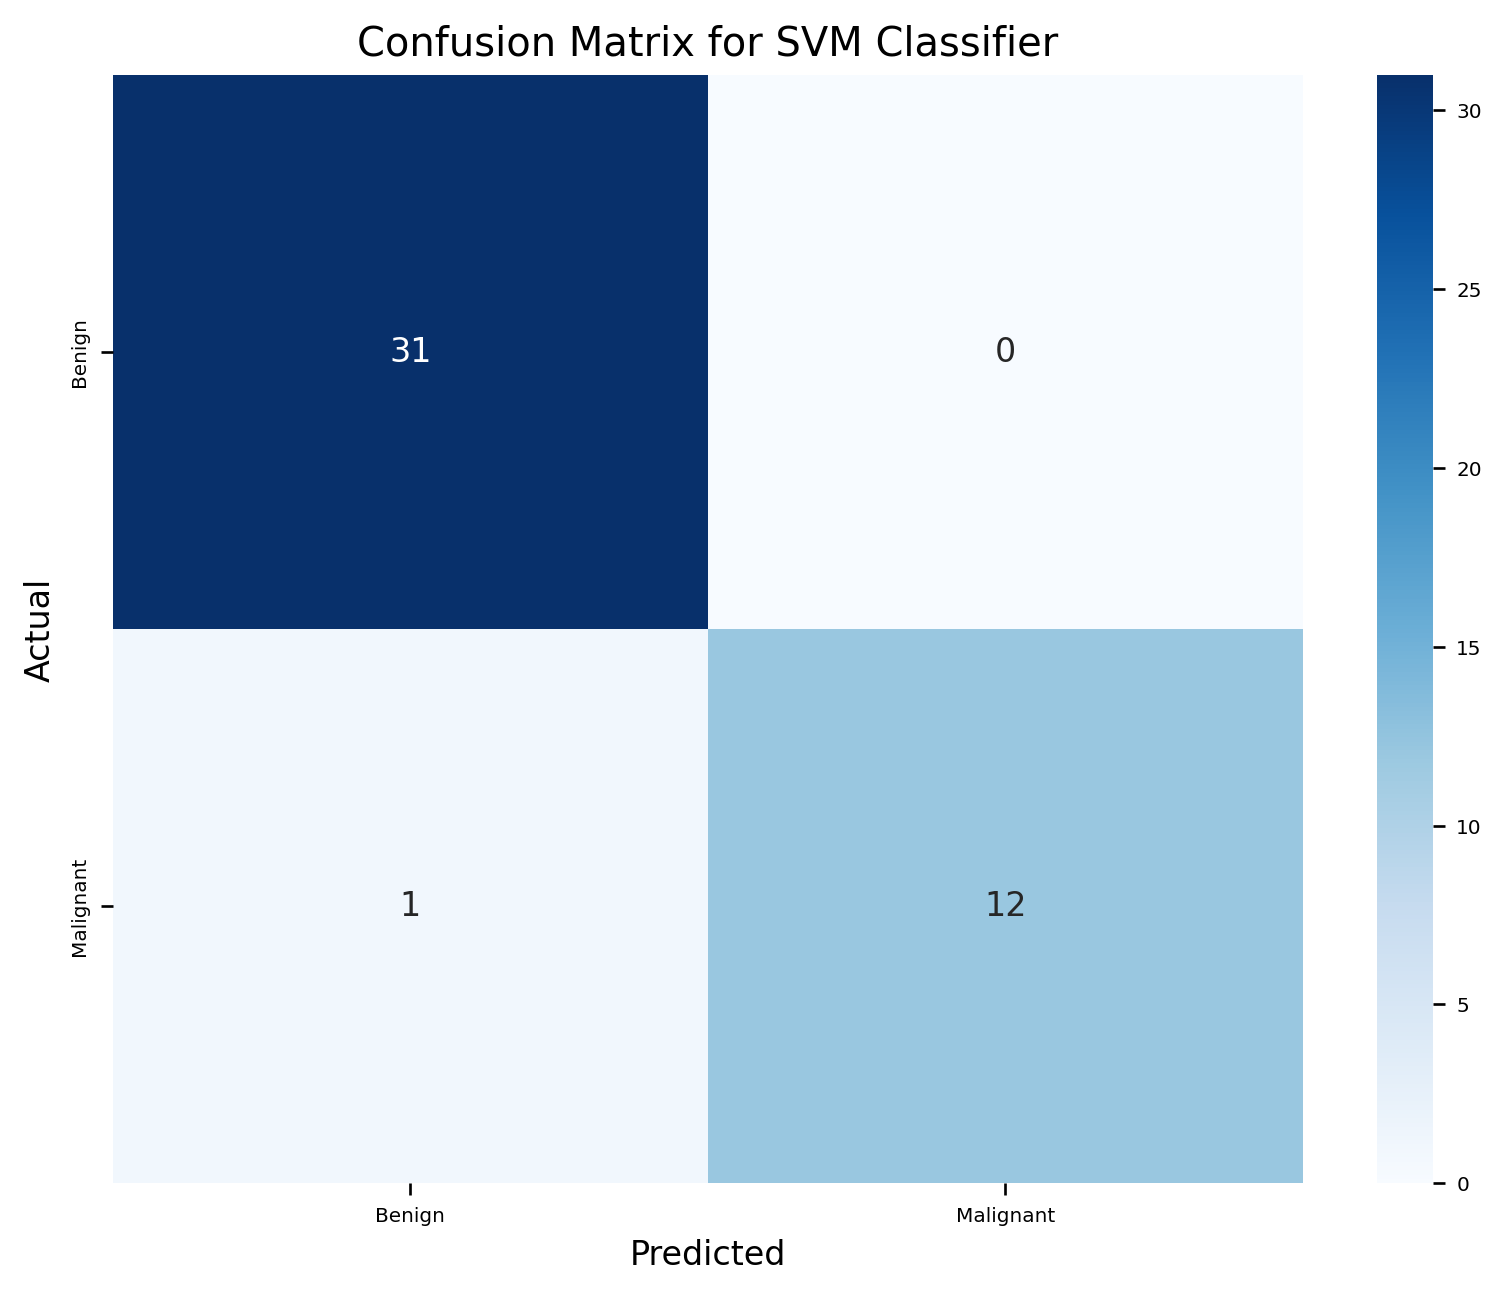


Random Forest Classifier:
Accuracy: 0.91
Balanced Accuracy: 0.85
Recall: 0.69
Precision: 1.00
AUC: 0.85
F1 Score: 0.82
F-beta Score (beta=0.1): 1.00
F-beta Score (beta=10): 0.69


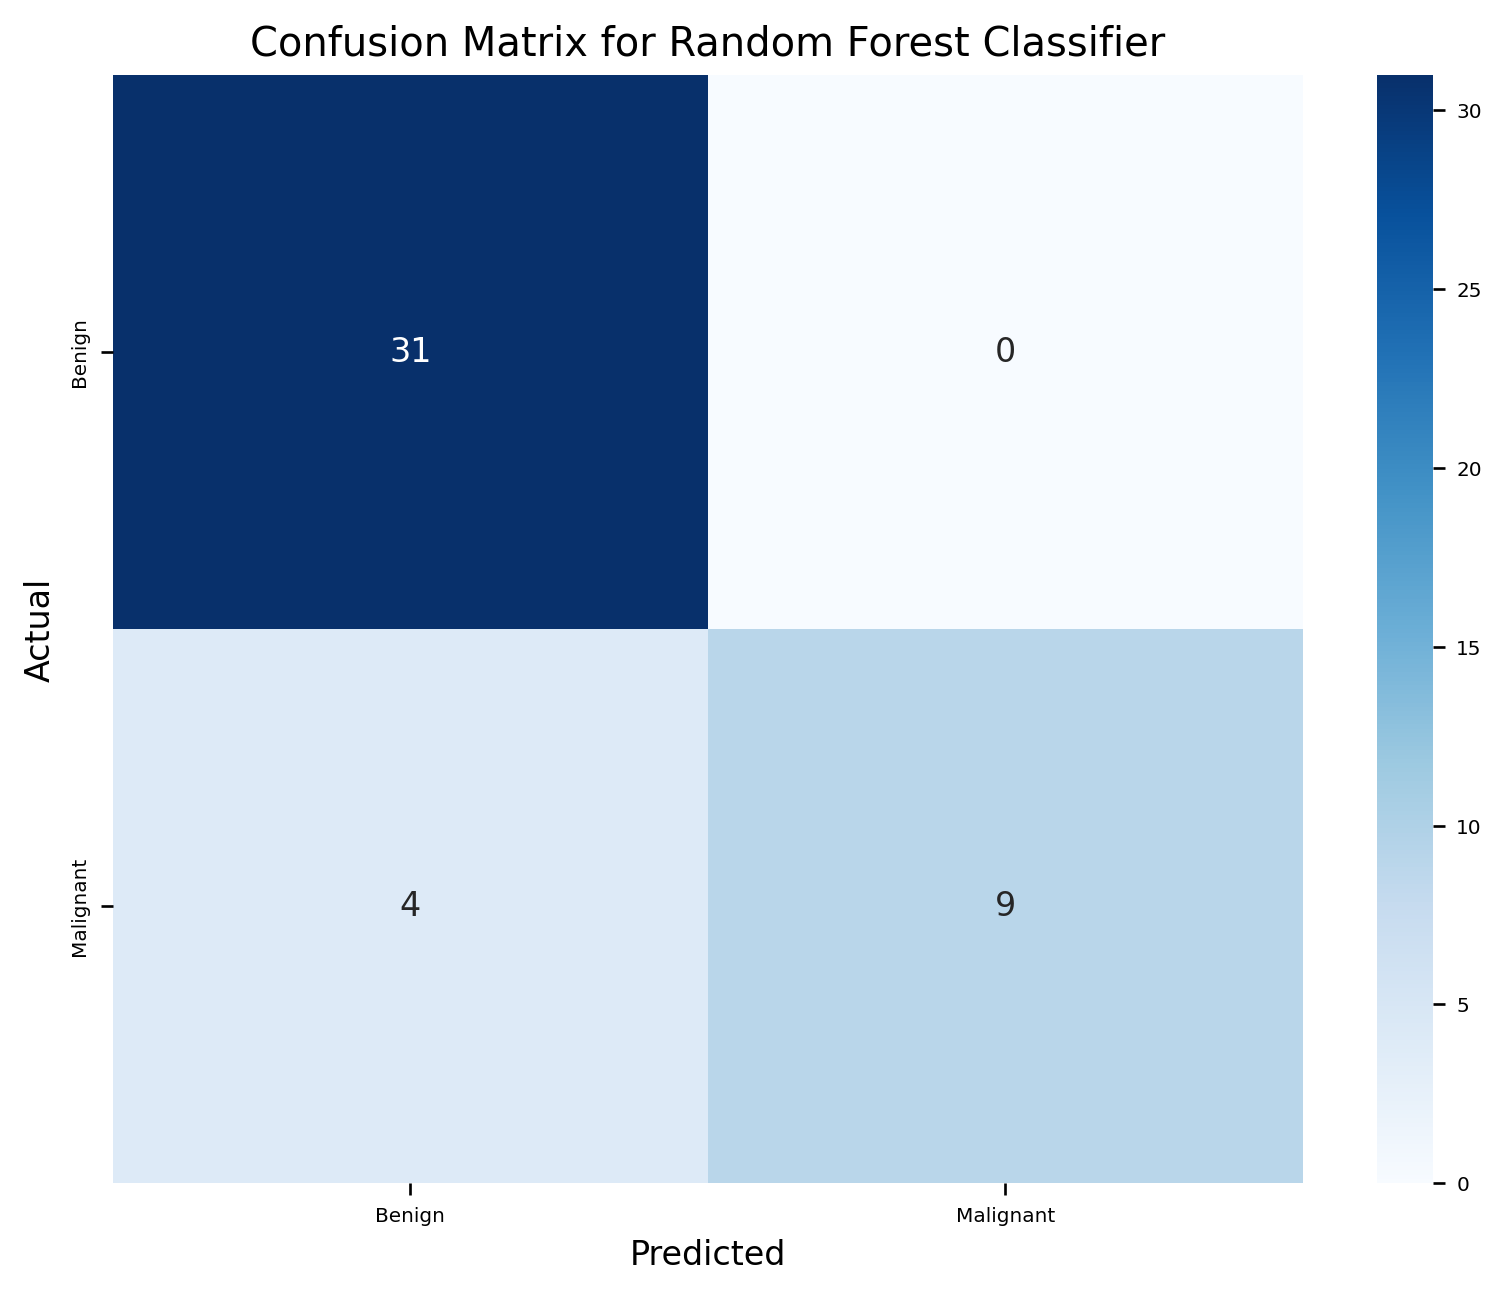

In [42]:
# Evaluate the best models
for model, name in zip([best_sgd_clf, best_svm_clf, best_rf_clf], ['SGD', 'SVM', 'Random Forest']):
    predictions = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    auc = roc_auc_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    fbeta_0_1 = fbeta_score(y_test, predictions, beta=0.1)
    fbeta_10 = fbeta_score(y_test, predictions, beta=10)
    conf_matrix = confusion_matrix(y_test, predictions)
    
    print(f"\n{name} Classifier:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Balanced Accuracy: {balanced_accuracy:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"AUC: {auc:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"F-beta Score (beta=0.1): {fbeta_0_1:.2f}")
    print(f"F-beta Score (beta=10): {fbeta_10:.2f}")
    
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name} Classifier')
    plt.show()

### 3.3 Final results

From the final results calculate the _probability_ that a sample from a person with a malignant tumour is given a result that they do not have cancer.

In [44]:
# Given confusion matrix values of svm(as my best model)
TN = 31
FP = 0
FN = 1
TP = 12

# Calculate False Negative Rate
false_negative_rate = FN / (FN + TP)

# Print the False Negative Rate
print(f"So the given probability is: {false_negative_rate:.2f}")


So the given probability is: 0.08


## 4. Decision Boundaries [10%]
 - To finish up, the client wants a visualisation of how the final model is working and your line manager has asked you to show some of the decision boundaries.
 - The client also wants to know if your method has met their performance specifications.
 - Follow the next three steps (4.1, 4.2 and 4.3) to do these things.

### 4.1 Discriminative features

Although it is only possible to know the true usefulness of a feature when you've combined it with others in a machine learning method, it is still helpful to have some measure for how discriminative each feature is on its own.  One common method for doing this is to calculate a T-score (often used in statistics, and in the LDA machine learning method) for each feature.  

The formula for the T-score is:

_(mean(x2) - mean(x1))/(0.5*(stddev(x2) + stddev(x1)))_

where x1 and x2 are the feature values corresponding to the two classes. Large values for the T-score (either positive or negative) indicate discriminative ability.

**Calculate the T-score for each feature and print out the best 4 features according to this score.**

In [45]:
from sklearn.feature_selection import f_classif

# Calculate T-scores using ANOVA F-test
f_values, p_values = f_classif(X, y)

# Create a DataFrame to store the results
t_score_df = pd.DataFrame({'Feature': X.columns, 'T-score': f_values})

# Sort the DataFrame by T-score in descending order and select the top 4 features
top_features = t_score_df.sort_values(by='T-score', ascending=False).head(4)

# Print the top 4 features
print("Top 4 features according to T-score:")
print(top_features)

Top 4 features according to T-score:
                Feature     T-score
7   mean concave points  298.002220
2        mean perimeter  199.030864
13           area error  163.146739
3             mean area  146.589689


In [60]:
# Extract the names of the top 4 features
best_features = top_features['Feature'].values

In [71]:
# Train a classifier on the scaled data
clf = SGDClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

SGDClassifier(random_state=42)

### 4.2 Visualise decision boundaries

**Display the decision boundaries** for each pair of features from the best 4 chosen above.  You can use the functions below to help if you like.

Instead of using the simple mean as the input for `xmean` in `plot_contours`, use the following:

_0.5*(mean(x1) + mean(x2))_

where x1 and x2 are the data associated with the two classes.  This way of calculating a "mean" point takes into account any imbalance between the classes.

In [72]:
def make_meshgrid(x, y, ns=100):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on (only min and max used)
    y: data to base y-axis meshgrid on (only min and max used)
    ns: number of steps in grid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min(), x.max()
    y_min, y_max = y.min(), y.max()
    hx = (x_max - x_min)/ns
    hy = (y_max - y_min)/ns
    xx, yy = np.meshgrid(np.arange(x_min, x_max + hx, hx), np.arange(y_min, y_max + hy, hy))
    return xx, yy

In [73]:
def plot_contours(clf, xx, yy, xmean, n1, n2, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    xmean : 1d array of N mean values (used to populate constant features with)
    n1, n2: index numbers of features that change
              that is, which features xx and yy represent, from the set of N features
    params: dictionary of params to pass to contourf, optional
    """
    # The following lines makes an MxN matrix to pass to the classifier (# samples x # features)
    # It does this by multiplying Mx1 and 1xN matrices, where the former is filled with 1's
    #  where M is the number of grid points in xx and N is the number of features in xmean
    #  It is done in such a way that the xmean vector is replaced in each row
    fullx = np.ones((xx.ravel().shape[0],1)) * np.reshape(xmean,(1,-1))
    fullx[:,n1] = xx.ravel()
    fullx[:,n2] = yy.ravel()
    Z = clf.predict(fullx)
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

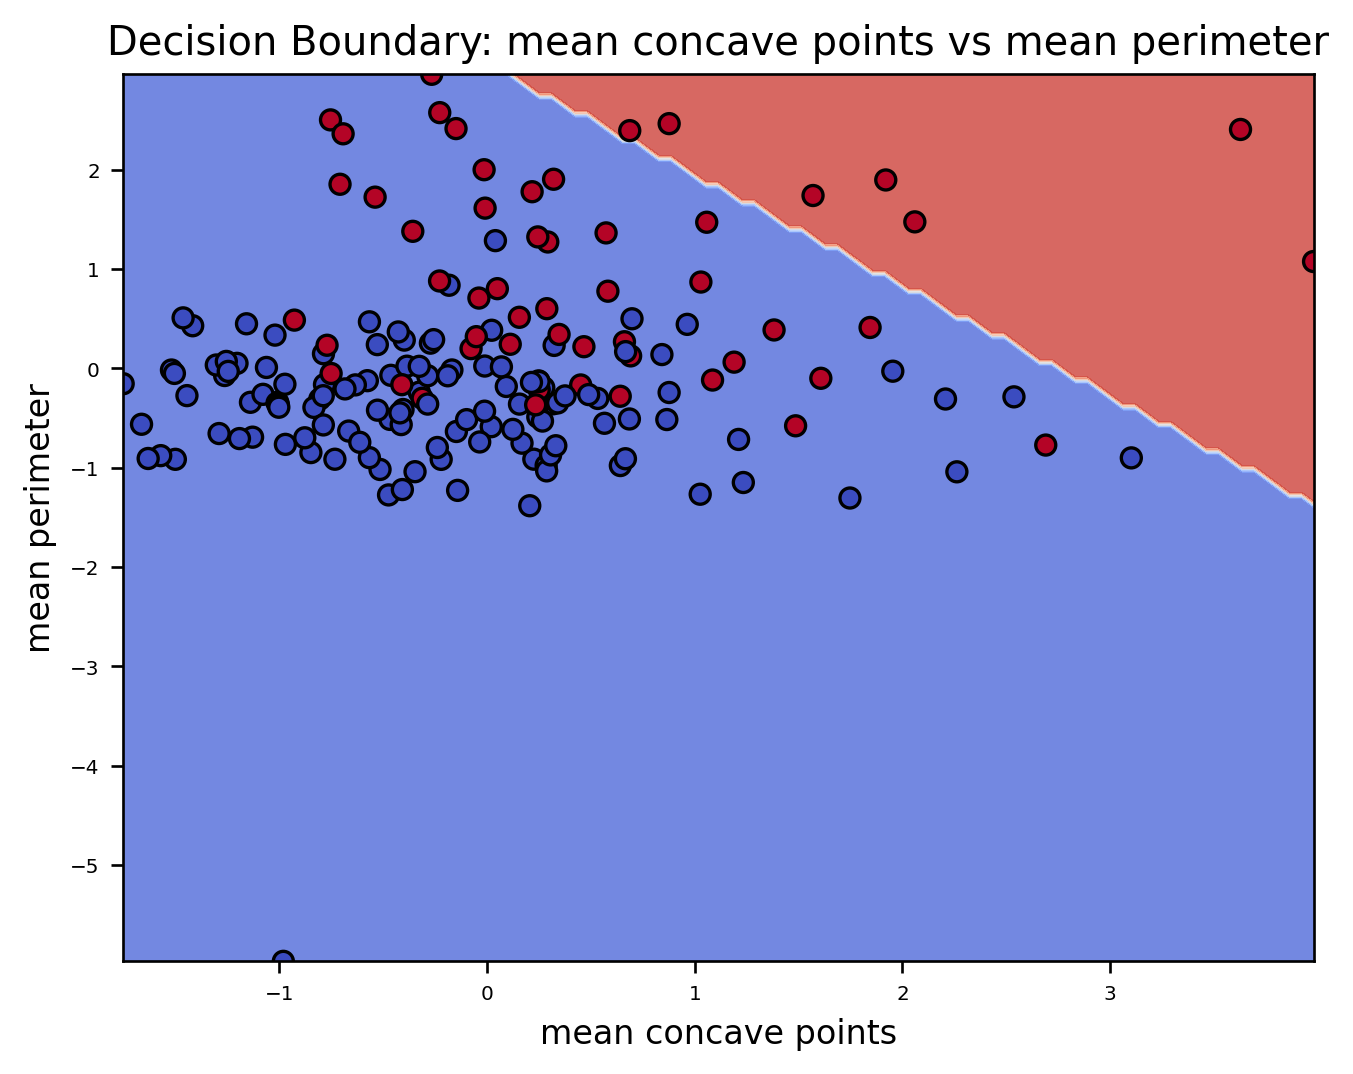

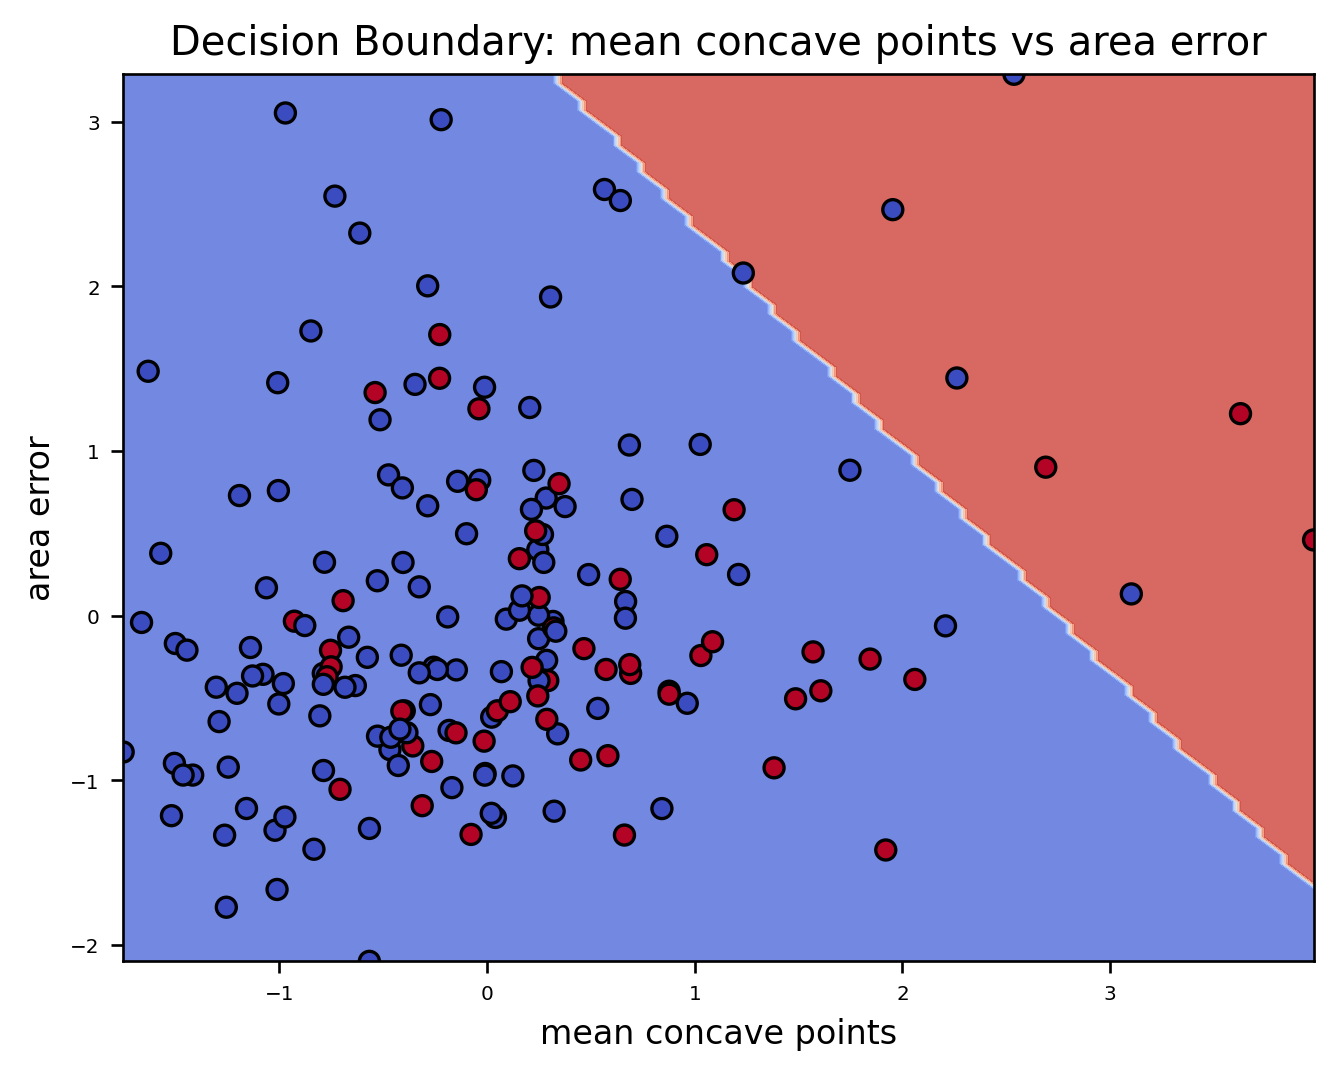

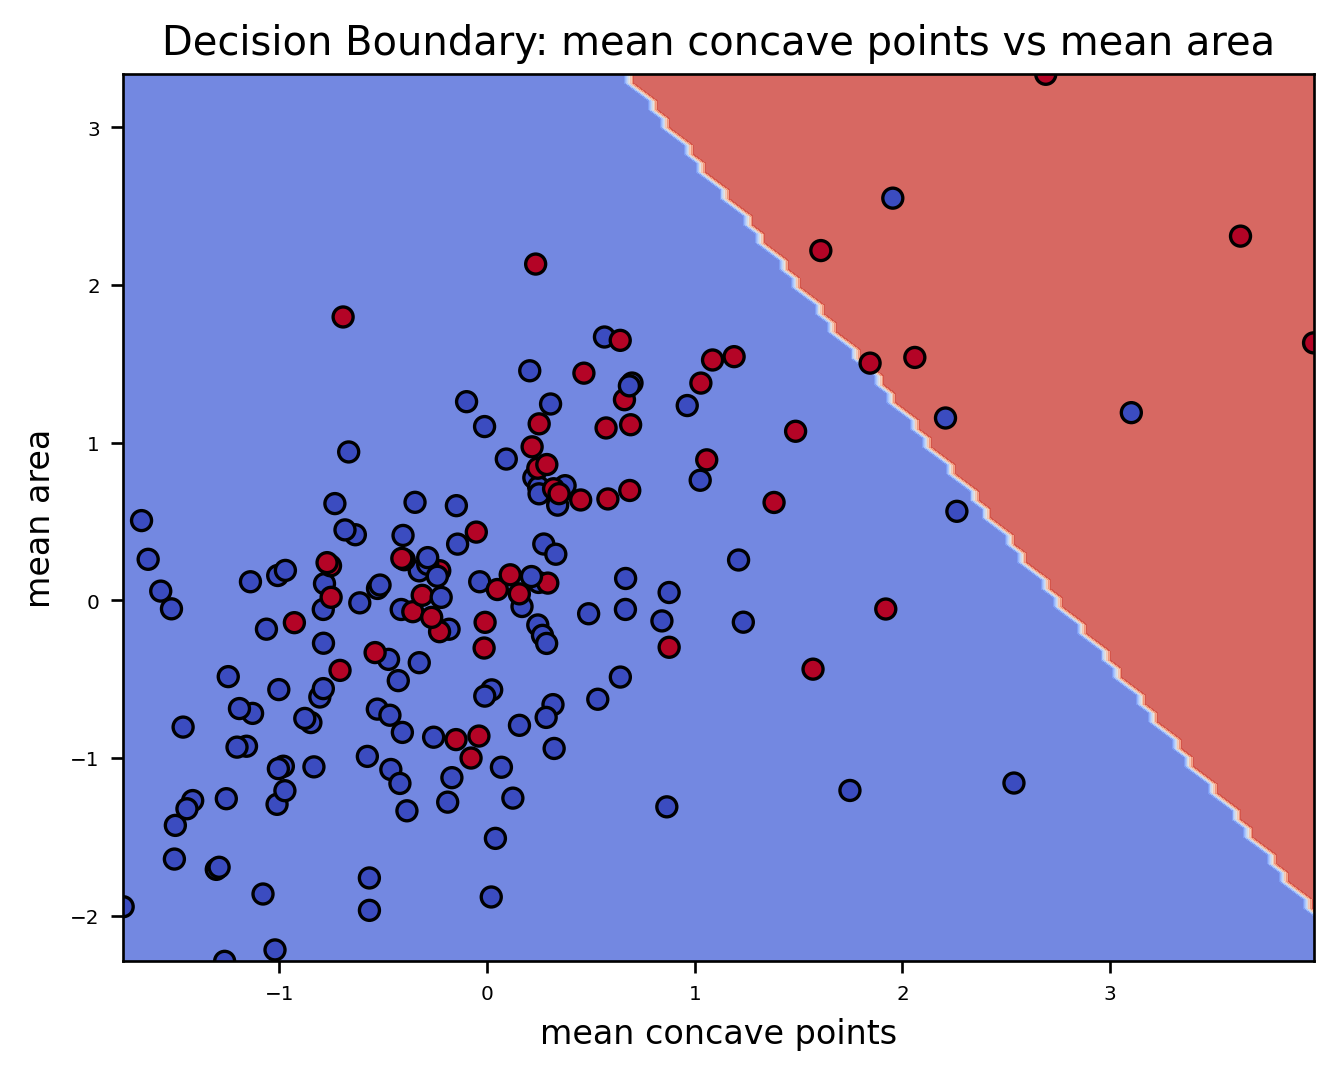

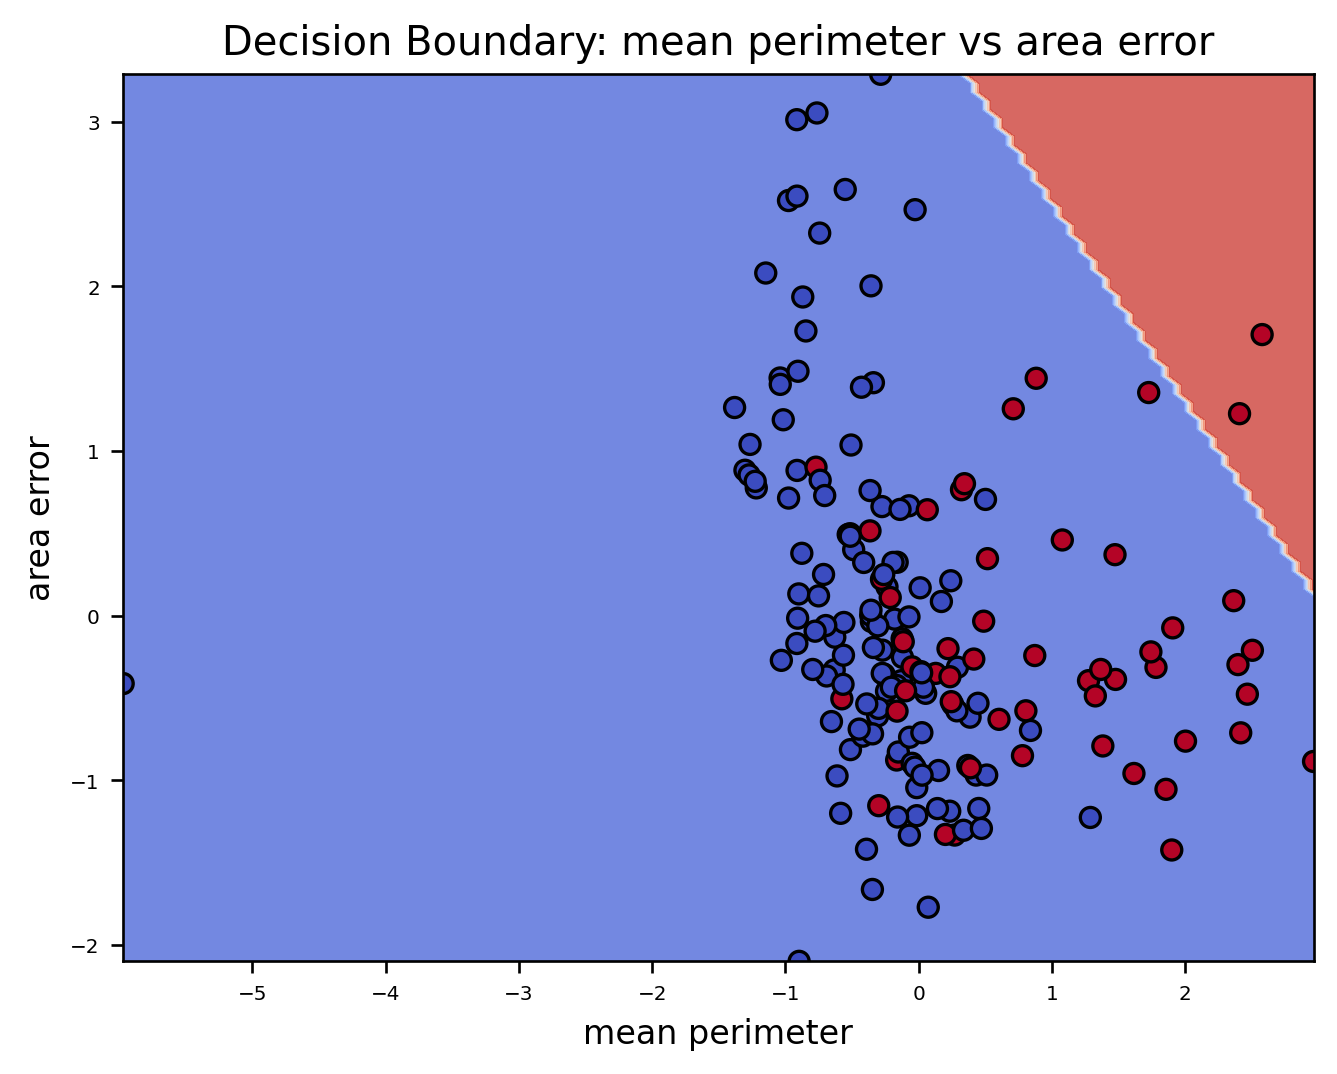

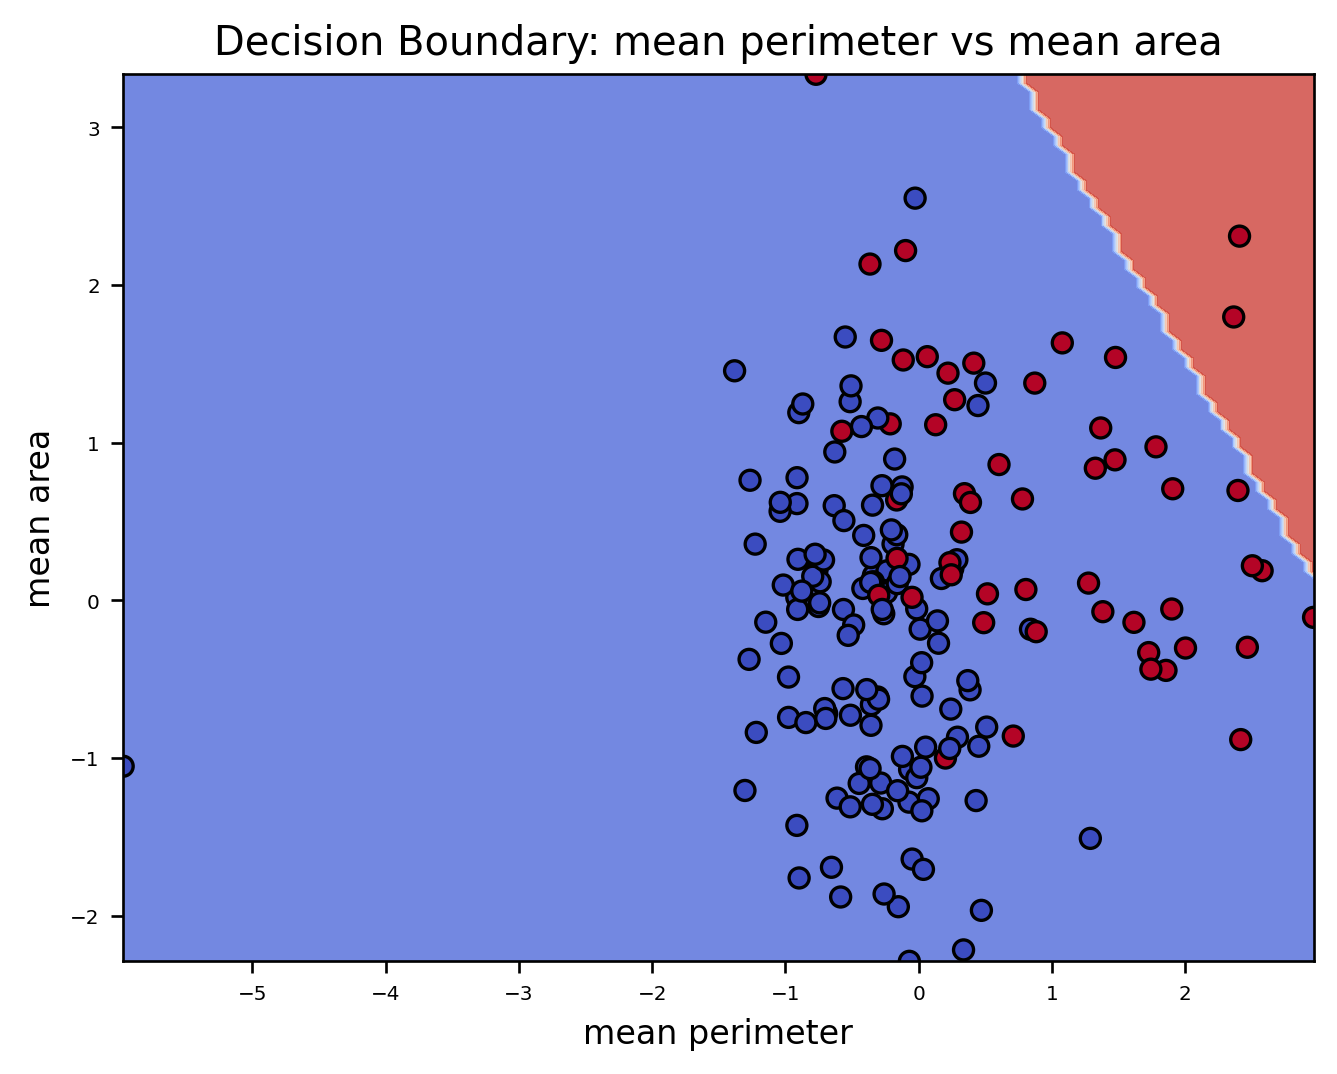

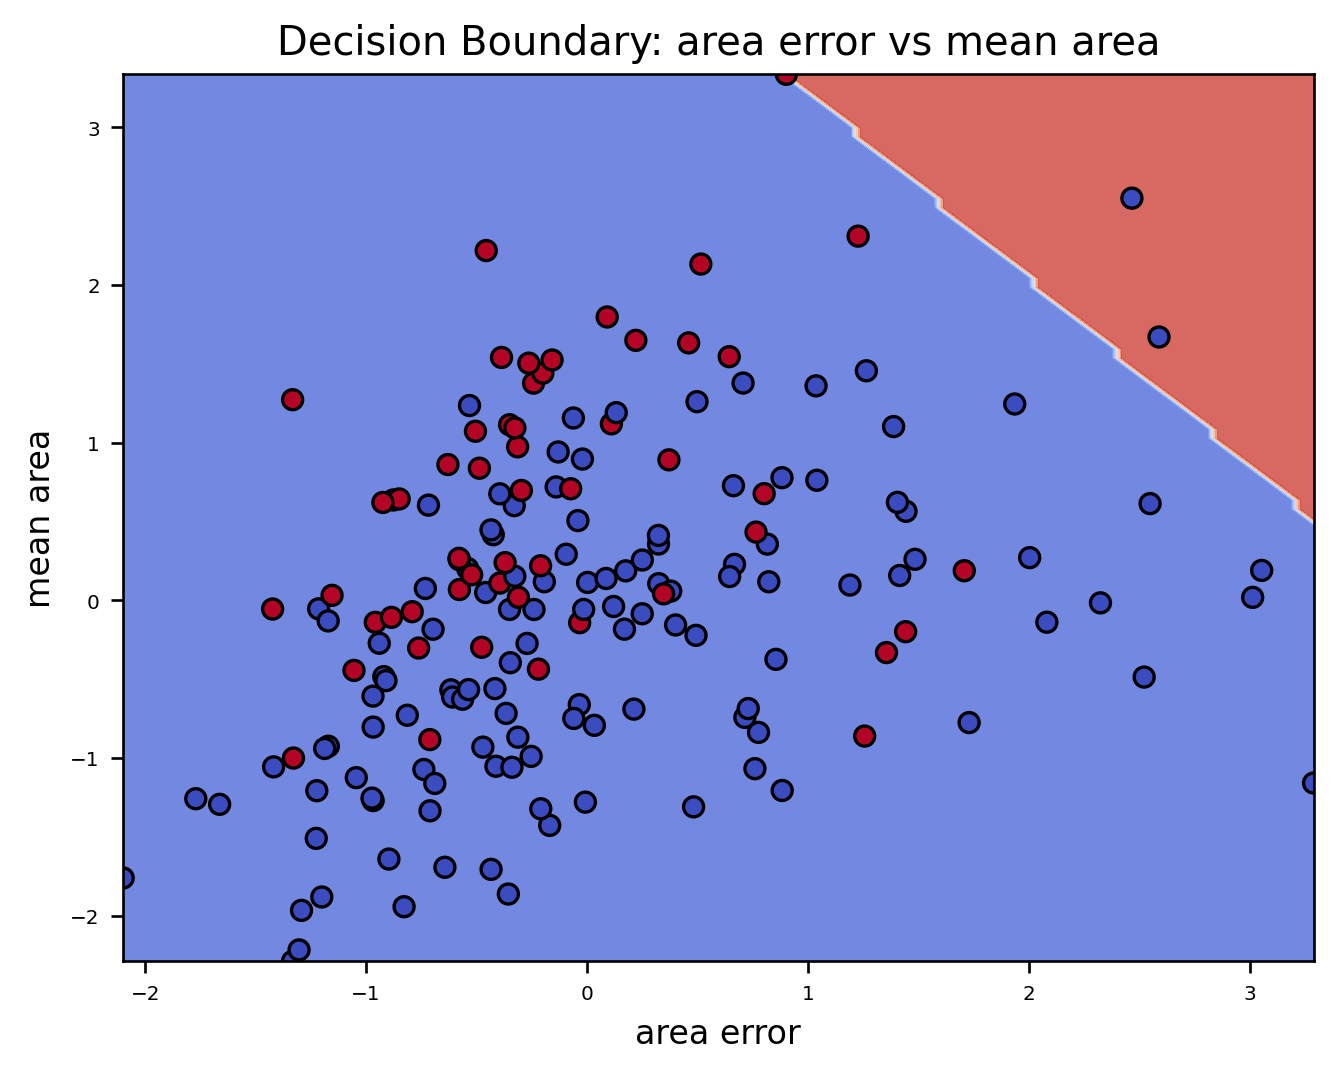

In [74]:
# Plot decision boundaries for each pair of the top 4 features
for i in range(len(best_features)):
    for j in range(i + 1, len(best_features)):
        feature1 = best_features[i]
        feature2 = best_features[j]
        n1 = X.columns.get_loc(feature1)
        n2 = X.columns.get_loc(feature2)
        
        x1 = X_train_scaled[y_train == 0][:, n1]
        x2 = X_train_scaled[y_train == 1][:, n1]
        xmean1 = 0.5 * (x1.mean() + x2.mean())
        
        x1 = X_train_scaled[y_train == 0][:, n2]
        x2 = X_train_scaled[y_train == 1][:, n2]
        xmean2 = 0.5 * (x1.mean() + x2.mean())
        
        xmean = np.mean(X_train_scaled, axis=0)
        xmean[n1] = xmean1
        xmean[n2] = xmean2
        
        xx, yy = make_meshgrid(X_train_scaled[:, n1], X_train_scaled[:, n2])
        
        plt.figure()
        plot_contours(clf, xx, yy, xmean, n1, n2, alpha=0.8, cmap=plt.cm.coolwarm)
        plt.scatter(X_train_scaled[:, n1], X_train_scaled[:, n2], c=y_train, edgecolors='k', cmap=plt.cm.coolwarm)
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.title(f'Decision Boundary: {feature1} vs {feature2}')
        plt.show()

### 4.3 Performance specification
**Does the final model meet the client's criteria?  Explain why or why not.** [100 words maximum]

**The final model that best meets the client's criteria is the SVM Classifier. It achieves:**

Recall (Sensitivity): 0.92, which means it has a 92% probability of detecting malignant cancer when it is present, exceeding the client's requirement of at least 90%.
Precision: 1.00, ensuring no more than 1 in 5 healthy cases result in a false positive, as there are no false positives.
Thus, the SVM Classifier satisfies both requirements: high sensitivity for malignant detection and a low false positive rate for benign cases. The other models do not meet the recall requirement.